## Imports

In [279]:
import pickle
import pandas as pd

pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import k_means
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import fetch_mldata
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split


from matplotlib import pyplot as plt
%matplotlib inline

# Plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import iplot

# Scaler for PCA
from sklearn.preprocessing import StandardScaler

# imports for Clustering
from sklearn.cluster import MiniBatchKMeans

 #Hierarchial clustering
from time import time
from sklearn.cluster import AgglomerativeClustering
pd.options.display.max_rows

999

## Pickle Data

In [20]:
pickle_in = open("stats_19.pickle","rb")
test = pickle.load(pickle_in)

In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5553 entries, 0 to 12
Data columns (total 34 columns):
Jersey      5553 non-null object
Player      5553 non-null object
Yr          5533 non-null object
Pos         5522 non-null object
Ht          5553 non-null object
GP          5553 non-null object
GS          4176 non-null object
MP          5183 non-null object
FGM         4994 non-null float64
FGA         5112 non-null float64
FG%         5112 non-null float64
3FG         3893 non-null float64
3FGA        4420 non-null float64
3FG%        4420 non-null float64
FT          4796 non-null float64
FTA         4864 non-null float64
FT%         4864 non-null float64
PTS         5045 non-null float64
Avg         5045 non-null float64
ORebs       5258 non-null float64
DRebs       5390 non-null float64
Tot Reb     5424 non-null float64
Avg.1       5424 non-null float64
AST         4865 non-null float64
TO          5376 non-null float64
STL         4814 non-null float64
BLK         4276 no

In [22]:
pickle_in2 = open("stats_18.pickle","rb")
test2 = pickle.load(pickle_in2)

In [23]:
test2.head()

,Jersey,Player,Yr,Pos,Ht,GP,GS,MP,FGM,FGA,FG%,3FG,3FGA,3FG%,FT,FTA,FT%,PTS,Avg,ORebs,DRebs,Tot Reb,Avg.1,AST,TO,STL,BLK,PF,G,DQ,Dbl Dbl,Trpl Dbl,Team
0,15,"Mbamalu, Brittany",Sr,G,5-8,31,31,1007:00,131.0,371.0,35.31,82.0,253.0,32.41,56.0,76.0,73.68,400.0,12.90,17.0,111.0,128.0,4.13,74.0,93.0,29.0,8.0,49.0,31,NaN,NaN,NaN,A&M-Corpus Christi
1,22,"Booth, Dalesia",So,F,5-9,31,31,937:00,127.0,291.0,43.64,2.0,14.0,14.29,57.0,77.0,74.03,313.0,10.10,57.0,116.0,173.0,5.58,36.0,55.0,38.0,38.0,53.0,31,1.0,3.0,NaN,A&M-Corpus Christi
2,20,"Henry, Kre'Ana",Sr,F,5-11,31,10,623:00,85.0,204.0,41.67,14.0,41.0,34.15,47.0,65.0,72.31,231.0,7.45,43.0,92.0,135.0,4.35,20.0,47.0,17.0,11.0,64.0,31,NaN,NaN,NaN,A&M-Corpus Christi
3,11,"Robinson, La'Janeira",So,G,5-7,31,8,494:00,43.0,111.0,38.74,14.0,41.0,34.15,17.0,25.0,68.00,117.0,3.77,10.0,36.0,46.0,1.48,43.0,41.0,28.0,1.0,44.0,31,NaN,NaN,NaN,A&M-Corpus Christi
4,12,"Evans, Dae Dae",So,G,5-7,30,22,822:00,81.0,221.0,36.65,11.0,46.0,23.91,36.0,61.0,59.02,209.0,6.97,21.0,70.0,91.0,3.03,67.0,75.0,43.0,7.0,52.0,30,1.0,NaN,NaN,A&M-Corpus Christi


## Tot_Stats Pickle

In [24]:
pickle_in = open("tot_stats.pickle","rb")
tot_stats = pickle.load(pickle_in)

## EDA

In [25]:
tot_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15474 entries, 0 to 9
Data columns (total 34 columns):
Jersey      15474 non-null object
Player      15474 non-null object
Yr          15272 non-null object
Pos         15148 non-null object
Ht          15474 non-null object
GP          15474 non-null object
GS          13553 non-null object
MP          14732 non-null object
FGM         14230 non-null float64
FGA         14580 non-null float64
FG%         14580 non-null float64
3FG         10802 non-null float64
3FGA        12430 non-null float64
3FG%        12430 non-null float64
FT          13682 non-null float64
FTA         13875 non-null float64
FT%         13875 non-null float64
PTS         14381 non-null float64
Avg         14381 non-null float64
ORebs       14687 non-null float64
DRebs       15083 non-null float64
Tot Reb     15179 non-null float64
Avg.1       15179 non-null float64
AST         13861 non-null float64
TO          15049 non-null float64
STL         13747 non-null f

In [87]:
tot_stats.head(30)

,Jersey,Player,Yr,Pos,Ht,GP,GS,MP,FGM,FGA,FG%,3FG,3FGA,3FG%,FT,FTA,FT%,PTS,Avg,ORebs,DRebs,Tot Reb,Avg.1,AST,TO,STL,BLK,PF,G,DQ,Dbl Dbl,Trpl Dbl,Team,Year
0,21,Young Emma,Fr,G,5-10,32,21,606:00,62.0,165.0,37.58,18.0,62.0,29.03,49.0,64.0,76.56,191.0,5.97,30.0,67.0,97.0,3.03,50.0,72.0,25.0,7.0,67.0,32,1.0,NaN,NaN,A&M-Corpus Christi,2017
1,12,Evans Dae Dae,Fr,G,5-7,32,13,580:00,62.0,164.0,37.80,6.0,20.0,30.00,33.0,78.0,42.31,163.0,5.09,18.0,57.0,75.0,2.34,37.0,87.0,25.0,5.0,45.0,32,NaN,NaN,NaN,A&M-Corpus Christi,2017
2,4,Davis Camesha,Sr,F,6-1,32,19,801:00,94.0,187.0,50.27,1.0,2.0,50.00,52.0,70.0,74.29,241.0,7.53,61.0,127.0,188.0,5.88,43.0,58.0,30.0,41.0,70.0,32,2.0,5.0,NaN,A&M-Corpus Christi,2017
3,10,Jackson Brianna,Jr,G,5-6,31,7,479:00,57.0,160.0,35.62,10.0,41.0,24.39,17.0,22.0,77.27,141.0,4.55,20.0,35.0,55.0,1.77,19.0,21.0,22.0,NaN,34.0,31,NaN,NaN,NaN,A&M-Corpus Christi,2017
4,32,Booth Dalesia,Fr,F,5-9,31,23,696:00,94.0,211.0,44.55,NaN,1.0,0.00,54.0,73.0,73.97,242.0,7.81,47.0,60.0,107.0,3.45,31.0,55.0,26.0,25.0,47.0,31,NaN,NaN,NaN,A&M-Corpus Christi,2017
5,5,Jolivette Uri,So,F,5-10,31,16,629:00,35.0,102.0,34.31,NaN,NaN,NaN,31.0,46.0,67.39,101.0,3.26,53.0,73.0,126.0,4.06,23.0,40.0,10.0,12.0,59.0,31,1.0,NaN,NaN,A&M-Corpus Christi,2017
6,22,Plummer Ashanti,Sr,F,6-2,30,21,593:00,66.0,156.0,42.31,NaN,NaN,NaN,53.0,65.0,81.54,185.0,6.17,60.0,81.0,141.0,4.70,15.0,38.0,15.0,32.0,77.0,30,NaN,1.0,NaN,A&M-Corpus Christi,2017
7,34,Matthews Tiara,Fr,F,5-10,29,NaN,285:00,30.0,69.0,43.48,NaN,NaN,NaN,22.0,48.0,45.83,82.0,2.83,38.0,42.0,80.0,2.76,9.0,30.0,12.0,2.0,50.0,29,1.0,NaN,NaN,A&M-Corpus Christi,2017
8,15,Mbamalu Brittany,Jr,G,5-8,28,19,773:00,83.0,271.0,30.63,55.0,195.0,28.21,39.0,52.0,75.00,260.0,9.29,16.0,101.0,117.0,4.18,39.0,60.0,22.0,9.0,46.0,28,1.0,1.0,NaN,A&M-Corpus Christi,2017
9,11,Jones Kassie,Sr,G,5-7,28,14,540:00,79.0,201.0,39.30,20.0,58.0,34.48,76.0,86.0,88.37,254.0,9.07,6.0,50.0,56.0,2.00,41.0,40.0,29.0,5.0,45.0,28,NaN,NaN,NaN,A&M-Corpus Christi,2017


In [27]:
tot_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15474 entries, 0 to 9
Data columns (total 34 columns):
Jersey      15474 non-null object
Player      15474 non-null object
Yr          15272 non-null object
Pos         15148 non-null object
Ht          15474 non-null object
GP          15474 non-null object
GS          13553 non-null object
MP          14732 non-null object
FGM         14230 non-null float64
FGA         14580 non-null float64
FG%         14580 non-null float64
3FG         10802 non-null float64
3FGA        12430 non-null float64
3FG%        12430 non-null float64
FT          13682 non-null float64
FTA         13875 non-null float64
FT%         13875 non-null float64
PTS         14381 non-null float64
Avg         14381 non-null float64
ORebs       14687 non-null float64
DRebs       15083 non-null float64
Tot Reb     15179 non-null float64
Avg.1       15179 non-null float64
AST         13861 non-null float64
TO          15049 non-null float64
STL         13747 non-null f

In [83]:
tot_stats.Pos.unique()

array(['G', 'F', 'C', nan, '*'], dtype=object)

In [29]:
count = tot_stats['Yr'].value_counts() 
print(count) 

Fr    3703
Jr    3336
So    3241
Sr    2886
-     2106
Name: Yr, dtype: int64


In [30]:
 count_GP = tot_stats['GP'].value_counts() 
print(count_GP)

-     2106
30    1723
31    1323
29    1187
32     902
33     790
28     698
27     566
34     469
26     462
25     329
24     307
23     305
21     241
20     235
22     234
35     230
19     225
15     196
17     185
16     180
1      177
7      172
13     171
8      169
18     166
10     164
9      162
14     162
12     158
5      157
3      153
6      150
11     140
2      131
4      113
36     101
37      79
38      36
39      20
Name: GP, dtype: int64


In [31]:
tot_stats.loc[tot_stats['Yr'] == '-']


,Jersey,Player,Yr,Pos,Ht,GP,GS,MP,FGM,FGA,FG%,3FG,3FGA,3FG%,FT,FTA,FT%,PTS,Avg,ORebs,DRebs,Tot Reb,Avg.1,AST,TO,STL,BLK,PF,G,DQ,Dbl Dbl,Trpl Dbl,Team,Year
13,-,TEAM,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,61.0,127.0,3.97,NaN,11.0,NaN,NaN,NaN,32,NaN,NaN,NaN,A&M-Corpus Christi,2017
14,-,Totals,-,-,-,-,-,6425:00,679.0,1754.0,38.71,114.0,396.0,28.79,469.0,670.0,70.00,1941.0,60.66,422.0,797.0,1219.0,38.09,355.0,570.0,243.0,141.0,579.0,32,6.0,NaN,NaN,A&M-Corpus Christi,2017
15,-,Opponent Totals,-,-,-,-,-,6425:00,697.0,1800.0,38.72,194.0,567.0,34.22,376.0,537.0,70.02,1964.0,61.38,362.0,736.0,1098.0,34.31,389.0,522.0,295.0,81.0,651.0,32,24.0,NaN,NaN,A&M-Corpus Christi,2017
12,-,TEAM,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,48.0,128.0,4.00,NaN,7.0,NaN,NaN,NaN,32,NaN,NaN,NaN,Abilene Christian,2017
13,-,Totals,-,-,-,-,-,6425:00,791.0,1908.0,41.46,274.0,846.0,32.39,443.0,614.0,72.15,2299.0,71.84,513.0,804.0,1317.0,41.16,493.0,540.0,261.0,115.0,528.0,32,10.0,NaN,NaN,Abilene Christian,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,-,Totals,-,-,-,-,-,6548:00,791.0,1991.0,39.73,196.0,691.0,28.36,372.0,565.0,65.84,2150.0,67.19,381.0,830.0,1211.0,37.84,407.0,483.0,328.0,93.0,525.0,32,11.0,NaN,NaN,Yale,2018
16,-,Opponent Totals,-,-,-,-,-,6549:00,765.0,1878.0,40.73,203.0,600.0,33.83,343.0,502.0,68.33,2076.0,64.88,363.0,908.0,1271.0,39.72,458.0,607.0,250.0,119.0,566.0,32,8.0,NaN,NaN,Yale,2018
15,-,TEAM,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,57.0,111.0,3.47,NaN,9.0,NaN,NaN,NaN,32,NaN,NaN,NaN,Youngstown St.,2018
16,-,Totals,-,-,-,-,-,6451:00,731.0,1788.0,40.88,276.0,815.0,33.87,314.0,436.0,72.02,2052.0,64.12,295.0,780.0,1075.0,33.59,453.0,463.0,178.0,104.0,522.0,32,9.0,NaN,NaN,Youngstown St.,2018


In [32]:
tot_stats=tot_stats[tot_stats['Jersey'] != '-']

In [33]:
tot_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13368 entries, 0 to 9
Data columns (total 34 columns):
Jersey      13368 non-null object
Player      13368 non-null object
Yr          13166 non-null object
Pos         13042 non-null object
Ht          13368 non-null object
GP          13368 non-null object
GS          11447 non-null object
MP          13328 non-null object
FGM         12826 non-null float64
FGA         13176 non-null float64
FG%         13176 non-null float64
3FG         9398 non-null float64
3FGA        11026 non-null float64
3FG%        11026 non-null float64
FT          12278 non-null float64
FTA         12471 non-null float64
FT%         12471 non-null float64
PTS         12973 non-null float64
Avg         12973 non-null float64
ORebs       12581 non-null float64
DRebs       12977 non-null float64
Tot Reb     13073 non-null float64
Avg.1       13073 non-null float64
AST         12457 non-null float64
TO          12943 non-null float64
STL         12343 non-null fl

In [34]:
with open('wncaa_tot.pickle', 'wb') as to_write:
    pickle.dump(tot_stats, to_write)

In [36]:
tot_stats.GP.unique()

array(['32', '31', '30', '29', '28', '27', '10', '25', '12', '2', '19',
       '17', '8', '7', '6', '1', '21', '13', '36', '35', '11', '26', '23',
       '16', '24', '3', '33', '9', '5', '4', '18', '15', '20', '14', '22',
       '37', '34', '39', '38'], dtype=object)

In [18]:
tot_stats.loc[tot_stats['Avg.1'] == nan]

NameError: name 'nan' is not defined

In [37]:
tot_stats[tot_stats['3FG%'].isnull()]

,Jersey,Player,Yr,Pos,Ht,GP,GS,MP,FGM,FGA,FG%,3FG,3FGA,3FG%,FT,FTA,FT%,PTS,Avg,ORebs,DRebs,Tot Reb,Avg.1,AST,TO,STL,BLK,PF,G,DQ,Dbl Dbl,Trpl Dbl,Team,Year
5,5,Jolivette Uri,So,F,5-10,31,16,629:00,35.0,102.0,34.31,NaN,NaN,NaN,31.0,46.0,67.39,101.0,3.26,53.0,73.0,126.0,4.06,23.0,40.0,10.0,12.0,59.0,31,1.0,NaN,NaN,A&M-Corpus Christi,2017
6,22,Plummer Ashanti,Sr,F,6-2,30,21,593:00,66.0,156.0,42.31,NaN,NaN,NaN,53.0,65.0,81.54,185.0,6.17,60.0,81.0,141.0,4.70,15.0,38.0,15.0,32.0,77.0,30,NaN,1.0,NaN,A&M-Corpus Christi,2017
7,34,Matthews Tiara,Fr,F,5-10,29,NaN,285:00,30.0,69.0,43.48,NaN,NaN,NaN,22.0,48.0,45.83,82.0,2.83,38.0,42.0,80.0,2.76,9.0,30.0,12.0,2.0,50.0,29,1.0,NaN,NaN,A&M-Corpus Christi,2017
10,13,Oluoch Taudenciah,Jr,C,6-3,12,0,37:00,9.0,18.0,50.00,NaN,NaN,NaN,6.0,12.0,50.00,24.0,2.00,8.0,7.0,15.0,1.25,NaN,3.0,NaN,1.0,8.0,12,NaN,NaN,NaN,Abilene Christian,2017
5,32,Glaab Darby,So,F,5-11,27,3,307:00,11.0,35.0,31.43,NaN,NaN,NaN,12.0,16.0,75.00,34.0,1.26,12.0,23.0,35.0,1.30,7.0,20.0,9.0,1.0,38.0,27,1.0,NaN,NaN,Air Force,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,32,Hill Erin,Fr,F,6-2,15,NaN,52:24,6.0,10.0,60.00,NaN,NaN,NaN,1.0,3.0,33.33,13.0,0.87,5.0,10.0,15.0,1.00,3.0,6.0,NaN,2.0,4.0,15,NaN,0.0,0.0,Yale,2019
12,22,Chavarin Aerial,Jr,G,5-10,6,NaN,6:00,1.0,3.0,33.33,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.33,NaN,2.0,2.0,0.33,NaN,1.0,NaN,NaN,2.0,6,NaN,NaN,NaN,Yale,2019
14,33,Nesbitt Roxanne,Fr,G,5-6,2,NaN,2:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,0.50,NaN,NaN,NaN,NaN,1.0,2,NaN,NaN,NaN,Yale,2019
15,44,Lezon Jessica,Jr,C,6-6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Yale,2019


In [38]:
test=tot_stats["Yr"].fillna((-1))

In [39]:
tot_stats["GP"]=tot_stats["GP"].fillna((0))

## Stats_1 Dataframe with Dropped columns

In [40]:
stats_1=tot_stats.drop(columns = ['Jersey','Player','Yr','Pos','Ht','MP','Team','G','Year'])

## Heatmap w/out Minutes Played

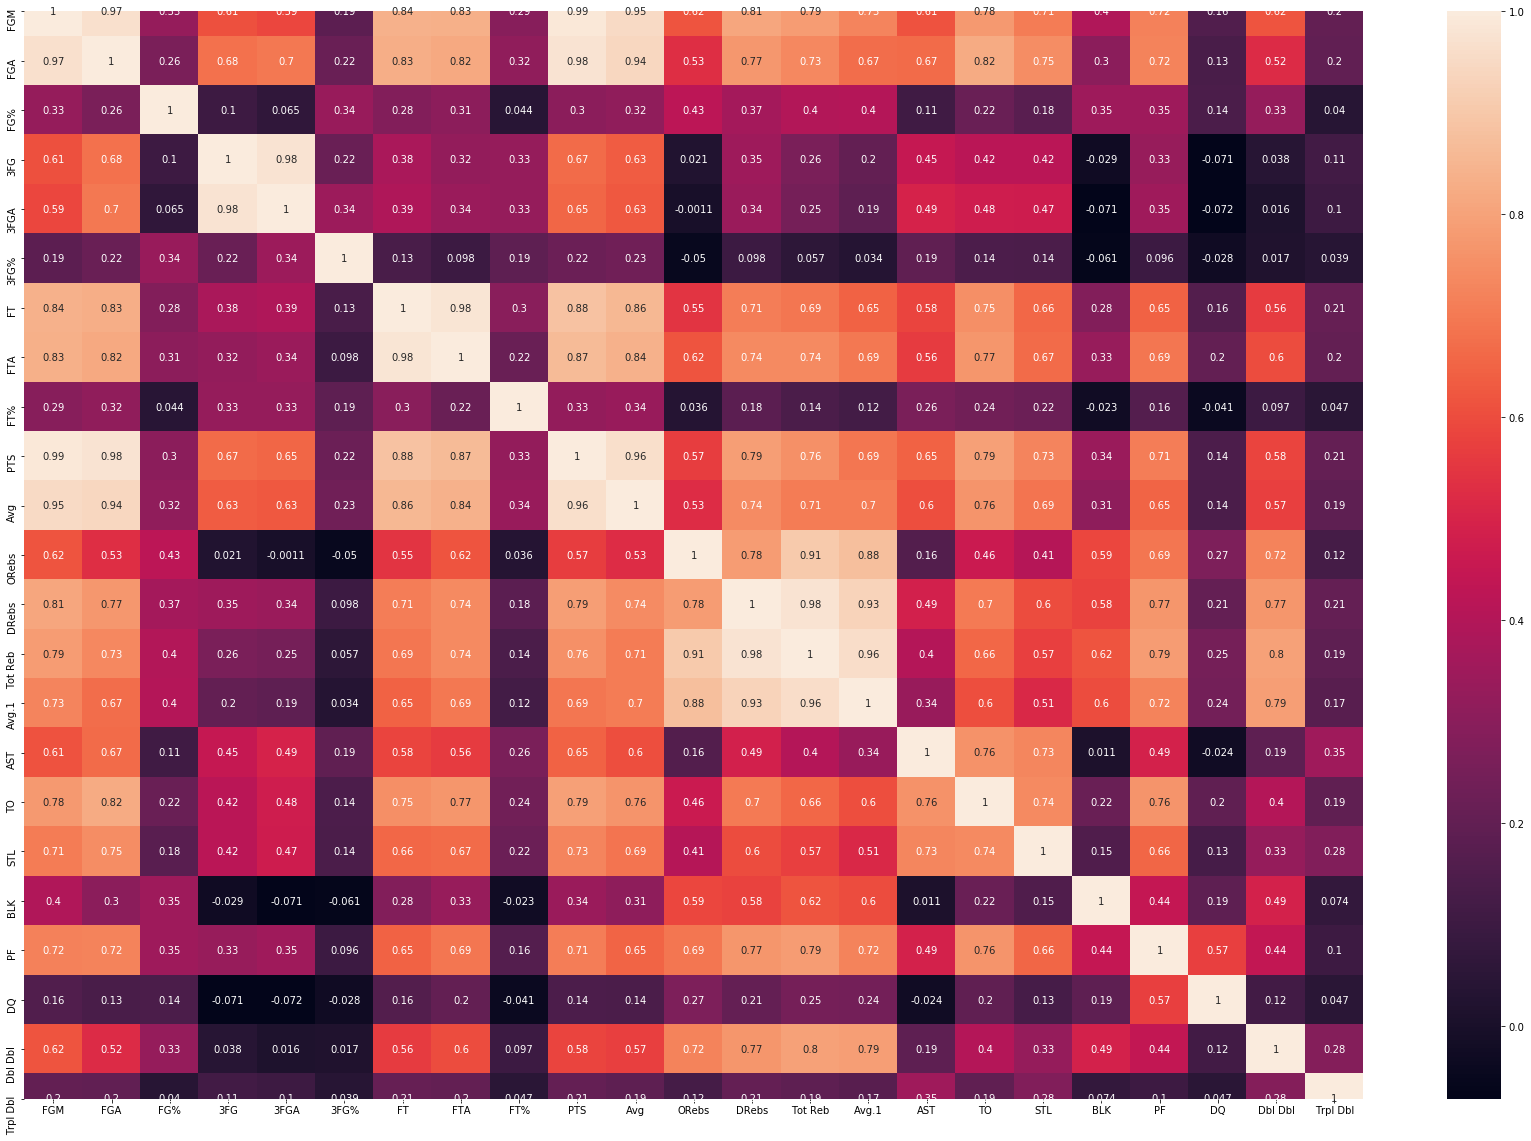

In [41]:
plt.figure(figsize=(30,20))
sns.heatmap(stats_1.corr(),annot=True)

In [42]:
stats_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13368 entries, 0 to 9
Data columns (total 25 columns):
GP          13368 non-null object
GS          11447 non-null object
FGM         12826 non-null float64
FGA         13176 non-null float64
FG%         13176 non-null float64
3FG         9398 non-null float64
3FGA        11026 non-null float64
3FG%        11026 non-null float64
FT          12278 non-null float64
FTA         12471 non-null float64
FT%         12471 non-null float64
PTS         12973 non-null float64
Avg         12973 non-null float64
ORebs       12581 non-null float64
DRebs       12977 non-null float64
Tot Reb     13073 non-null float64
Avg.1       13073 non-null float64
AST         12457 non-null float64
TO          12943 non-null float64
STL         12343 non-null float64
BLK         10714 non-null float64
PF          13016 non-null float64
DQ          4892 non-null float64
Dbl Dbl     6442 non-null float64
Trpl Dbl    4267 non-null float64
dtypes: float64(23), objec

In [43]:
stats_1.head()

,GP,GS,FGM,FGA,FG%,3FG,3FGA,3FG%,FT,FTA,FT%,PTS,Avg,ORebs,DRebs,Tot Reb,Avg.1,AST,TO,STL,BLK,PF,DQ,Dbl Dbl,Trpl Dbl
0,32,21,62.0,165.0,37.58,18.0,62.0,29.03,49.0,64.0,76.56,191.0,5.97,30.0,67.0,97.0,3.03,50.0,72.0,25.0,7.0,67.0,1.0,NaN,NaN
1,32,13,62.0,164.0,37.80,6.0,20.0,30.00,33.0,78.0,42.31,163.0,5.09,18.0,57.0,75.0,2.34,37.0,87.0,25.0,5.0,45.0,NaN,NaN,NaN
2,32,19,94.0,187.0,50.27,1.0,2.0,50.00,52.0,70.0,74.29,241.0,7.53,61.0,127.0,188.0,5.88,43.0,58.0,30.0,41.0,70.0,2.0,5.0,NaN
3,31,7,57.0,160.0,35.62,10.0,41.0,24.39,17.0,22.0,77.27,141.0,4.55,20.0,35.0,55.0,1.77,19.0,21.0,22.0,NaN,34.0,NaN,NaN,NaN
4,31,23,94.0,211.0,44.55,NaN,1.0,0.00,54.0,73.0,73.97,242.0,7.81,47.0,60.0,107.0,3.45,31.0,55.0,26.0,25.0,47.0,NaN,NaN,NaN


## Stats_2 Dataframe with dropped stats columns

In [44]:
stats_2=stats_1.drop(columns = ['GP','GS','FGA','FG%','3FGA','3FG%','PTS','Tot Reb','Avg.1','TO','DQ','Dbl Dbl','Trpl Dbl','Avg'])

In [45]:
stats_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13368 entries, 0 to 9
Data columns (total 11 columns):
FGM      12826 non-null float64
3FG      9398 non-null float64
FT       12278 non-null float64
FTA      12471 non-null float64
FT%      12471 non-null float64
ORebs    12581 non-null float64
DRebs    12977 non-null float64
AST      12457 non-null float64
STL      12343 non-null float64
BLK      10714 non-null float64
PF       13016 non-null float64
dtypes: float64(11)
memory usage: 1.2 MB


In [46]:
stats_2=stats_2.drop(columns = ['FTA','FT%'])

## Min_Max Scaler

In [57]:
min_max = MinMaxScaler()

X = min_max.fit_transform(stats_2)

In [58]:
print (X)

[[0.15048544 0.11688312 0.16554054 ... 0.12953368 0.0546875  0.5037594 ]
 [0.15048544 0.03896104 0.11148649 ... 0.12953368 0.0390625  0.33834586]
 [0.22815534 0.00649351 0.17567568 ... 0.15544041 0.3203125  0.52631579]
 ...
 [0.04126214 0.01948052 0.05743243 ... 0.06735751 0.0546875  0.41353383]
 [0.02184466 0.02597403 0.00675676 ... 0.01036269 0.0234375  0.08270677]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [59]:
min_max_df=pd.DataFrame(X, columns=stats_2.columns)

In [60]:
min_max_df.head()

,FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF
0,0.150485,0.116883,0.165541,0.126582,0.168342,0.160772,0.129534,0.054688,0.503759
1,0.150485,0.038961,0.111486,0.075949,0.143216,0.118971,0.129534,0.039062,0.338346
2,0.228155,0.006494,0.175676,0.257384,0.319095,0.138264,0.155440,0.320312,0.526316
3,0.138350,0.064935,0.057432,0.084388,0.087940,0.061093,0.113990,0.000000,0.255639
4,0.228155,0.000000,0.182432,0.198312,0.150754,0.099678,0.134715,0.195312,0.353383


In [104]:
X

array([[0.15048544, 0.11688312, 0.16554054, ..., 0.12953368, 0.0546875 ,
        0.5037594 ],
       [0.15048544, 0.03896104, 0.11148649, ..., 0.12953368, 0.0390625 ,
        0.33834586],
       [0.22815534, 0.00649351, 0.17567568, ..., 0.15544041, 0.3203125 ,
        0.52631579],
       ...,
       [0.04126214, 0.01948052, 0.05743243, ..., 0.06735751, 0.0546875 ,
        0.41353383],
       [0.02184466, 0.02597403, 0.00675676, ..., 0.01036269, 0.0234375 ,
        0.08270677],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Kmeans from github

In [258]:
kmeans = k_means(X, n_clusters=3,max_iter=1000,n_init=20)


IndexError: tuple index out of range

In [115]:
stats_3 = stats_2.copy()
stats_3['new_pos'] = kmeans[1]

ValueError: Length of values does not match length of index

In [107]:
kmeans[2]

848.357329614694

In [108]:
silhouette_score(stats_3, kmeans[1])

0.36003765698206347

In [275]:
stats_3.head(3)

,FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF
0,62.0,18.0,49.0,30.0,67.0,50.0,25.0,7.0,67.0
1,62.0,6.0,33.0,18.0,57.0,37.0,25.0,5.0,45.0
2,94.0,1.0,52.0,61.0,127.0,43.0,30.0,41.0,70.0


In [86]:
stats_3['old_pos']=tot_stats['Pos']
stats_3.head(30)

,FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,old_pos
0,62.0,18.0,49.0,30.0,67.0,50.0,25.0,7.0,67.0,0,G
1,62.0,6.0,33.0,18.0,57.0,37.0,25.0,5.0,45.0,0,G
2,94.0,1.0,52.0,61.0,127.0,43.0,30.0,41.0,70.0,2,F
3,57.0,10.0,17.0,20.0,35.0,19.0,22.0,0.0,34.0,1,G
4,94.0,0.0,54.0,47.0,60.0,31.0,26.0,25.0,47.0,0,F
5,35.0,0.0,31.0,53.0,73.0,23.0,10.0,12.0,59.0,0,F
6,66.0,0.0,53.0,60.0,81.0,15.0,15.0,32.0,77.0,0,F
7,30.0,0.0,22.0,38.0,42.0,9.0,12.0,2.0,50.0,1,F
8,83.0,55.0,39.0,16.0,101.0,39.0,22.0,9.0,46.0,0,G
9,79.0,20.0,76.0,6.0,50.0,41.0,29.0,5.0,45.0,0,G


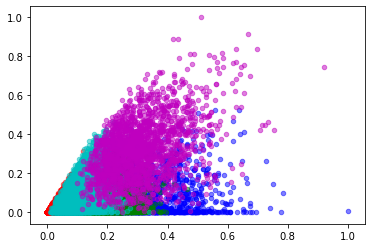

In [77]:
km = KMeans(n_clusters=5,random_state=20,n_init=1)
km.fit(X)
display_cluster(X,km,5)

## Kmeans Clustering from Lecture

In [62]:
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

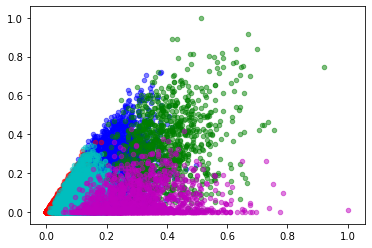

In [63]:
num_clusters = 5
km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
km.fit(X)
display_cluster(X,km,num_clusters)

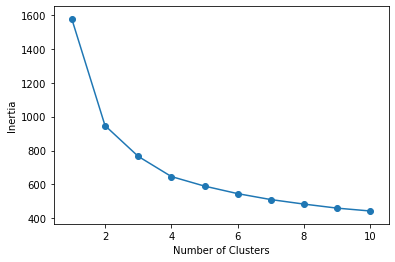

In [126]:
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X2)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

## Convert MP to an integer 

In [88]:
new = tot_stats["MP"].str.split(":", n = 1, expand = True)

In [89]:
tot_stats["Mins"]= new[0] 

In [90]:
tot_stats.head(30)

,Jersey,Player,Yr,Pos,Ht,GP,GS,MP,FGM,FGA,FG%,3FG,3FGA,3FG%,FT,FTA,FT%,PTS,Avg,ORebs,DRebs,Tot Reb,Avg.1,AST,TO,STL,BLK,PF,G,DQ,Dbl Dbl,Trpl Dbl,Team,Year,Mins
0,21,Young Emma,Fr,G,5-10,32,21,606:00,62.0,165.0,37.58,18.0,62.0,29.03,49.0,64.0,76.56,191.0,5.97,30.0,67.0,97.0,3.03,50.0,72.0,25.0,7.0,67.0,32,1.0,NaN,NaN,A&M-Corpus Christi,2017,606
1,12,Evans Dae Dae,Fr,G,5-7,32,13,580:00,62.0,164.0,37.80,6.0,20.0,30.00,33.0,78.0,42.31,163.0,5.09,18.0,57.0,75.0,2.34,37.0,87.0,25.0,5.0,45.0,32,NaN,NaN,NaN,A&M-Corpus Christi,2017,580
2,4,Davis Camesha,Sr,F,6-1,32,19,801:00,94.0,187.0,50.27,1.0,2.0,50.00,52.0,70.0,74.29,241.0,7.53,61.0,127.0,188.0,5.88,43.0,58.0,30.0,41.0,70.0,32,2.0,5.0,NaN,A&M-Corpus Christi,2017,801
3,10,Jackson Brianna,Jr,G,5-6,31,7,479:00,57.0,160.0,35.62,10.0,41.0,24.39,17.0,22.0,77.27,141.0,4.55,20.0,35.0,55.0,1.77,19.0,21.0,22.0,NaN,34.0,31,NaN,NaN,NaN,A&M-Corpus Christi,2017,479
4,32,Booth Dalesia,Fr,F,5-9,31,23,696:00,94.0,211.0,44.55,NaN,1.0,0.00,54.0,73.0,73.97,242.0,7.81,47.0,60.0,107.0,3.45,31.0,55.0,26.0,25.0,47.0,31,NaN,NaN,NaN,A&M-Corpus Christi,2017,696
5,5,Jolivette Uri,So,F,5-10,31,16,629:00,35.0,102.0,34.31,NaN,NaN,NaN,31.0,46.0,67.39,101.0,3.26,53.0,73.0,126.0,4.06,23.0,40.0,10.0,12.0,59.0,31,1.0,NaN,NaN,A&M-Corpus Christi,2017,629
6,22,Plummer Ashanti,Sr,F,6-2,30,21,593:00,66.0,156.0,42.31,NaN,NaN,NaN,53.0,65.0,81.54,185.0,6.17,60.0,81.0,141.0,4.70,15.0,38.0,15.0,32.0,77.0,30,NaN,1.0,NaN,A&M-Corpus Christi,2017,593
7,34,Matthews Tiara,Fr,F,5-10,29,NaN,285:00,30.0,69.0,43.48,NaN,NaN,NaN,22.0,48.0,45.83,82.0,2.83,38.0,42.0,80.0,2.76,9.0,30.0,12.0,2.0,50.0,29,1.0,NaN,NaN,A&M-Corpus Christi,2017,285
8,15,Mbamalu Brittany,Jr,G,5-8,28,19,773:00,83.0,271.0,30.63,55.0,195.0,28.21,39.0,52.0,75.00,260.0,9.29,16.0,101.0,117.0,4.18,39.0,60.0,22.0,9.0,46.0,28,1.0,1.0,NaN,A&M-Corpus Christi,2017,773
9,11,Jones Kassie,Sr,G,5-7,28,14,540:00,79.0,201.0,39.30,20.0,58.0,34.48,76.0,86.0,88.37,254.0,9.07,6.0,50.0,56.0,2.00,41.0,40.0,29.0,5.0,45.0,28,NaN,NaN,NaN,A&M-Corpus Christi,2017,540


In [91]:
tot_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13368 entries, 0 to 9
Data columns (total 35 columns):
Jersey      13368 non-null object
Player      13368 non-null object
Yr          13166 non-null object
Pos         13042 non-null object
Ht          13368 non-null object
GP          13368 non-null object
GS          11447 non-null object
MP          13328 non-null object
FGM         12826 non-null float64
FGA         13176 non-null float64
FG%         13176 non-null float64
3FG         9398 non-null float64
3FGA        11026 non-null float64
3FG%        11026 non-null float64
FT          12278 non-null float64
FTA         12471 non-null float64
FT%         12471 non-null float64
PTS         12973 non-null float64
Avg         12973 non-null float64
ORebs       12581 non-null float64
DRebs       12977 non-null float64
Tot Reb     13073 non-null float64
Avg.1       13073 non-null float64
AST         12457 non-null float64
TO          12943 non-null float64
STL         12343 non-null fl

## Over 100+ Mins Analysis

In [93]:
 tot_stats["Mins"]=tot_stats["Mins"].fillna((0))

In [94]:
tot_stats['Mins'] = tot_stats['Mins'].astype(np.int64)

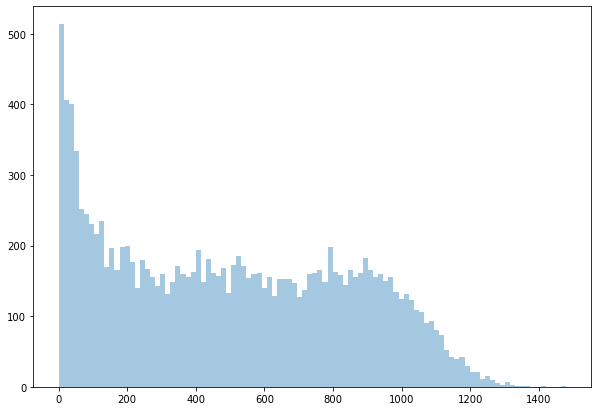

In [96]:
plt.figure(figsize=(10,7))
sns.distplot(tot_stats['Mins'].values.astype(int), bins=100, kde=False)

In [97]:
#create df for 100+ mins
over_100_mins = tot_stats[tot_stats.Mins >=100]

In [359]:
over_100_mins.tail()

,Jersey,Player,Yr,Pos,Ht,GP,GS,MP,FGM,FGA,FG%,3FG,3FGA,3FG%,FT,FTA,FT%,PTS,Avg,ORebs,DRebs,Tot Reb,Avg.1,AST,TO,STL,BLK,PF,G,DQ,Dbl Dbl,Trpl Dbl,Team,Year,Mins,2FGM
4,23,Cash Sarah,Sr,F,6-1,32,32,745:49,147.0,259.0,56.76,5.0,15.0,33.33,108.0,137.0,78.83,407.0,12.72,66.0,92.0,158.0,4.94,43.0,44.0,20.0,21.0,64.0,32,1.0,2.0,0.0,Youngstown St.,2019,745,142.0
5,02,Smolinski Alison,Sr,G,5-9,32,32,975:08,136.0,356.0,38.20,109.0,291.0,37.46,36.0,51.0,70.59,417.0,13.03,27.0,66.0,93.0,2.91,40.0,49.0,26.0,9.0,64.0,32,0.0,1.0,0.0,Youngstown St.,2019,975,27.0
6,04,Gibson Deleah,Fr,G,5-6,30,0,286:49,24.0,78.0,30.77,9.0,42.0,21.43,6.0,6.0,100.00,63.0,2.10,2.0,21.0,23.0,0.77,29.0,23.0,10.0,5.0,22.0,30,0.0,0.0,0.0,Youngstown St.,2019,286,15.0
7,01,Chikwe Amara,Fr,F,6-1,29,21,559:34,17.0,54.0,31.48,3.0,11.0,27.27,17.0,24.0,70.83,54.0,1.86,44.0,94.0,138.0,4.76,24.0,21.0,13.0,7.0,55.0,29,0.0,0.0,0.0,Youngstown St.,2019,559,14.0
8,44,Mallory Madison,Fr,F,6-2,22,0,184:17,9.0,35.0,25.71,4.0,26.0,15.38,2.0,4.0,50.00,24.0,1.09,8.0,14.0,22.0,1.00,5.0,11.0,2.0,3.0,11.0,22,0.0,0.0,0.0,Youngstown St.,2019,184,5.0


In [186]:
#created a 2FGM column to help with clustering
over_100_mins['2FGM']=over_100_mins['FGM']-over_100_mins['3FG']

In [187]:
over_100_mins.head()

,Jersey,Player,Yr,Pos,Ht,GP,GS,MP,FGM,FGA,FG%,3FG,3FGA,3FG%,FT,FTA,FT%,PTS,Avg,ORebs,DRebs,Tot Reb,Avg.1,AST,TO,STL,BLK,PF,G,DQ,Dbl Dbl,Trpl Dbl,Team,Year,Mins,2FGM
0,21,Young Emma,Fr,G,5-10,32,21,606:00,62.0,165.0,37.58,18.0,62.0,29.03,49.0,64.0,76.56,191.0,5.97,30.0,67.0,97.0,3.03,50.0,72.0,25.0,7.0,67.0,32,1.0,0.0,0.0,A&M-Corpus Christi,2017,606,44.0
1,12,Evans Dae Dae,Fr,G,5-7,32,13,580:00,62.0,164.0,37.80,6.0,20.0,30.00,33.0,78.0,42.31,163.0,5.09,18.0,57.0,75.0,2.34,37.0,87.0,25.0,5.0,45.0,32,0.0,0.0,0.0,A&M-Corpus Christi,2017,580,56.0
2,4,Davis Camesha,Sr,F,6-1,32,19,801:00,94.0,187.0,50.27,1.0,2.0,50.00,52.0,70.0,74.29,241.0,7.53,61.0,127.0,188.0,5.88,43.0,58.0,30.0,41.0,70.0,32,2.0,5.0,0.0,A&M-Corpus Christi,2017,801,93.0
3,10,Jackson Brianna,Jr,G,5-6,31,7,479:00,57.0,160.0,35.62,10.0,41.0,24.39,17.0,22.0,77.27,141.0,4.55,20.0,35.0,55.0,1.77,19.0,21.0,22.0,0.0,34.0,31,0.0,0.0,0.0,A&M-Corpus Christi,2017,479,47.0
4,32,Booth Dalesia,Fr,F,5-9,31,23,696:00,94.0,211.0,44.55,0.0,1.0,0.00,54.0,73.0,73.97,242.0,7.81,47.0,60.0,107.0,3.45,31.0,55.0,26.0,25.0,47.0,31,0.0,0.0,0.0,A&M-Corpus Christi,2017,696,94.0


In [183]:
over_100_mins=over_100_mins.fillna(0)

In [188]:
#dropped columns-same 9 as used in other analysis
over_100_mins_selected_cols=over_100_mins[['2FGM','3FG','FT','ORebs','DRebs','AST','STL','BLK','PF']]

In [173]:
#fill NAN
over_100_mins_selected_cols=over_100_mins_selected_cols.fillna(0)

In [190]:
over_100_mins_selected_cols.head()

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF
0,44.0,18.0,49.0,30.0,67.0,50.0,25.0,7.0,67.0
1,56.0,6.0,33.0,18.0,57.0,37.0,25.0,5.0,45.0
2,93.0,1.0,52.0,61.0,127.0,43.0,30.0,41.0,70.0
3,47.0,10.0,17.0,20.0,35.0,19.0,22.0,0.0,34.0
4,94.0,0.0,54.0,47.0,60.0,31.0,26.0,25.0,47.0


In [192]:
#min_max
X2 = min_max.fit_transform(over_100_mins_selected_cols)

In [191]:
over_100_mins_selected_cols.head()

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF
0,44.0,18.0,49.0,30.0,67.0,50.0,25.0,7.0,67.0
1,56.0,6.0,33.0,18.0,57.0,37.0,25.0,5.0,45.0
2,93.0,1.0,52.0,61.0,127.0,43.0,30.0,41.0,70.0
3,47.0,10.0,17.0,20.0,35.0,19.0,22.0,0.0,34.0
4,94.0,0.0,54.0,47.0,60.0,31.0,26.0,25.0,47.0


## KMeans with 3 Clusters

In [291]:
kmeans = k_means(X2, n_clusters=3,max_iter=1000,n_init=20)

In [292]:
over_100_df = over_100_mins_selected_cols.copy()
over_100_df['new_pos'] = kmeans[1]

In [196]:
over_100_df.head(30)

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos
0,44.0,18.0,49.0,30.0,67.0,50.0,25.0,7.0,67.0,2
1,56.0,6.0,33.0,18.0,57.0,37.0,25.0,5.0,45.0,1
2,93.0,1.0,52.0,61.0,127.0,43.0,30.0,41.0,70.0,0
3,47.0,10.0,17.0,20.0,35.0,19.0,22.0,0.0,34.0,1
4,94.0,0.0,54.0,47.0,60.0,31.0,26.0,25.0,47.0,0
5,35.0,0.0,31.0,53.0,73.0,23.0,10.0,12.0,59.0,1
6,66.0,0.0,53.0,60.0,81.0,15.0,15.0,32.0,77.0,0
7,30.0,0.0,22.0,38.0,42.0,9.0,12.0,2.0,50.0,1
8,28.0,55.0,39.0,16.0,101.0,39.0,22.0,9.0,46.0,2
9,59.0,20.0,76.0,6.0,50.0,41.0,29.0,5.0,45.0,2


In [293]:
over_100_df['new_pos'].value_counts() 

2    5661
0    3004
1    2388
Name: new_pos, dtype: int64

In [294]:
over_100_df['old_pos']=over_100_mins['Pos']

In [295]:
over_100_df.head(30)

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,old_pos
0,44.0,18.0,49.0,30.0,67.0,50.0,25.0,7.0,67.0,0,G
1,56.0,6.0,33.0,18.0,57.0,37.0,25.0,5.0,45.0,2,G
2,93.0,1.0,52.0,61.0,127.0,43.0,30.0,41.0,70.0,1,F
3,47.0,10.0,17.0,20.0,35.0,19.0,22.0,0.0,34.0,2,G
4,94.0,0.0,54.0,47.0,60.0,31.0,26.0,25.0,47.0,1,F
5,35.0,0.0,31.0,53.0,73.0,23.0,10.0,12.0,59.0,2,F
6,66.0,0.0,53.0,60.0,81.0,15.0,15.0,32.0,77.0,1,F
7,30.0,0.0,22.0,38.0,42.0,9.0,12.0,2.0,50.0,2,F
8,28.0,55.0,39.0,16.0,101.0,39.0,22.0,9.0,46.0,0,G
9,59.0,20.0,76.0,6.0,50.0,41.0,29.0,5.0,45.0,0,G


In [308]:
cluster3_centroids = pd.DataFrame(kmeans[0])
cluster3_centroids

,0,1,2,3,4,5,6,7,8
0,0.165903,0.269199,0.188578,0.109691,0.210649,0.254781,0.200483,0.052108,0.470015
1,0.255870,0.052081,0.195018,0.283776,0.307956,0.124670,0.154230,0.196519,0.579170
2,0.055967,0.059916,0.050290,0.072343,0.089832,0.061453,0.061404,0.038624,0.240452


In [301]:
over_100_df.sort_values(by=['new_pos']).groupby(['new_pos','old_pos']).count()

2FGM   3FG    FT  ORebs  DRebs   AST   STL   BLK    PF
new_pos old_pos                                                        
0       0          26    26    26     26     26    26    26    26    26
        C           7     7     7      7      7     7     7     7     7
        F         285   285   285    285    285   285   285   285   285
        G        2686  2686  2686   2686   2686  2686  2686  2686  2686
1       0          19    19    19     19     19    19    19    19    19
        C         355   355   355    355    355   355   355   355   355
        F        1527  1527  1527   1527   1527  1527  1527  1527  1527
        G         487   487   487    487    487   487   487   487   487
2       0         158   158   158    158    158   158   158   158   158
        *           1     1     1      1      1     1     1     1     1
        C         404   404   404    404    404   404   404   404   404
        F        1852  1852  1852   1852   1852  1852  1852  1852  1852
        G        3246  3246  3246   3246   3246  3246  3246  3246  3246

In [302]:
pca = PCA(n_components=2)
pca.fit(X2)

pcafeatures = pca.transform(X2)
pcafeatures

array([[ 0.08630463,  0.01651992],
       [-0.07101206, -0.01742233],
       [ 0.27523877, -0.22500924],
       ...,
       [-0.31537471,  0.02299611],
       [-0.03797194, -0.12173897],
       [-0.41565852, -0.03221658]])

In [303]:
pca.explained_variance_ratio_

array([0.55542164, 0.19461316])

In [ ]:
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(pcafeatures[0],pcafeatures[1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [297]:

over_100_df['new_pos'].value_counts()

2    5661
0    3004
1    2388
Name: new_pos, dtype: int64

In [242]:
over_100_df.describe()

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos
count,11053.000000,11053.000000,11053.000000,11053.000000,11053.000000,11053.000000,11053.000000,11053.000000,11053.000000,11053.000000
mean,53.032389,17.719895,35.262734,30.379987,68.407220,39.691215,23.013571,9.780964,50.633584,1.055098
std,46.124627,21.440376,32.231972,25.993937,47.155097,37.699191,17.933070,13.407795,24.273881,0.696109
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,18.000000,1.000000,11.000000,11.000000,32.000000,13.000000,9.000000,2.000000,31.000000,1.000000
50%,40.000000,9.000000,25.000000,23.000000,59.000000,28.000000,19.000000,5.000000,50.000000,1.000000
75%,76.000000,27.000000,50.000000,43.000000,94.000000,55.000000,32.000000,12.000000,69.000000,2.000000
max,411.000000,154.000000,296.000000,237.000000,398.000000,311.000000,193.000000,128.000000,133.000000,2.000000


## Kmeans with 4 Clusters

In [309]:
kmeans = k_means(X2, n_clusters=4,max_iter=1000,n_init=20)

In [312]:
kmeans_4clusters = over_100_mins_selected_cols.copy()
kmeans_4clusters['new_pos'] = kmeans[1]

In [314]:
kmeans_4clusters['new_pos'].value_counts() 

0    3849
3    3454
1    2097
2    1653
Name: new_pos, dtype: int64

In [315]:
kmeans_4clusters['old_pos']=over_100_mins['Pos']

In [316]:
kmeans_4clusters.head()

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,old_pos
0,44.0,18.0,49.0,30.0,67.0,50.0,25.0,7.0,67.0,3,G
1,56.0,6.0,33.0,18.0,57.0,37.0,25.0,5.0,45.0,3,G
2,93.0,1.0,52.0,61.0,127.0,43.0,30.0,41.0,70.0,2,F
3,47.0,10.0,17.0,20.0,35.0,19.0,22.0,0.0,34.0,0,G
4,94.0,0.0,54.0,47.0,60.0,31.0,26.0,25.0,47.0,3,F


In [317]:
cluster4_centroids = pd.DataFrame(kmeans[0])
cluster4_centroids

,0,1,2,3,4,5,6,7,8
0,0.038966,0.054919,0.036719,0.051132,0.066178,0.048821,0.047223,0.027595,0.179652
1,0.187479,0.314086,0.216512,0.112418,0.231282,0.288582,0.220433,0.055328,0.478417
2,0.298569,0.061341,0.230595,0.317453,0.350438,0.143428,0.175984,0.226690,0.609755
3,0.112500,0.086796,0.098249,0.132808,0.161154,0.109927,0.110693,0.071542,0.420231


In [318]:
kmeans_4clusters.sort_values(by=['new_pos']).groupby(['new_pos','old_pos']).count()

2FGM   3FG    FT  ORebs  DRebs   AST   STL   BLK    PF
new_pos old_pos                                                        
0       0         115   115   115    115    115   115   115   115   115
        *           1     1     1      1      1     1     1     1     1
        C         274   274   274    274    274   274   274   274   274
        F        1145  1145  1145   1145   1145  1145  1145  1145  1145
        G        2314  2314  2314   2314   2314  2314  2314  2314  2314
1       0          15    15    15     15     15    15    15    15    15
        C           3     3     3      3      3     3     3     3     3
        F         163   163   163    163    163   163   163   163   163
        G        1916  1916  1916   1916   1916  1916  1916  1916  1916
2       0          10    10    10     10     10    10    10    10    10
        C         256   256   256    256    256   256   256   256   256
        F        1039  1039  1039   1039   1039  1039  1039  1039  1039
        G         348   348   348    348    348   348   348   348   348
3       0          63    63    63     63     63    63    63    63    63
        C         233   233   233    233    233   233   233   233   233
        F        1317  1317  1317   1317   1317  1317  1317  1317  1317
        G        1841  1841  1841   1841   1841  1841  1841  1841  1841

## Kmeans with 5 Clusters

In [319]:
kmeans = k_means(X2, n_clusters=5,max_iter=1000,n_init=20)

In [320]:
kmeans_5clusters = over_100_mins_selected_cols.copy()
kmeans_5clusters['new_pos'] = kmeans[1]

In [321]:
kmeans_5clusters['new_pos'].value_counts() 

1    3979
3    2780
2    1692
0    1359
4    1243
Name: new_pos, dtype: int64

In [323]:
kmeans_5clusters['old_pos']=over_100_mins['Pos']

In [327]:
kmeans_5clusters.head(400)

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,old_pos
0,44.0,18.0,49.0,30.0,67.0,50.0,25.0,7.0,67.0,3,G
1,56.0,6.0,33.0,18.0,57.0,37.0,25.0,5.0,45.0,3,G
2,93.0,1.0,52.0,61.0,127.0,43.0,30.0,41.0,70.0,0,F
3,47.0,10.0,17.0,20.0,35.0,19.0,22.0,0.0,34.0,1,G
4,94.0,0.0,54.0,47.0,60.0,31.0,26.0,25.0,47.0,3,F
5,35.0,0.0,31.0,53.0,73.0,23.0,10.0,12.0,59.0,3,F
6,66.0,0.0,53.0,60.0,81.0,15.0,15.0,32.0,77.0,3,F
7,30.0,0.0,22.0,38.0,42.0,9.0,12.0,2.0,50.0,3,F
8,28.0,55.0,39.0,16.0,101.0,39.0,22.0,9.0,46.0,2,G
9,59.0,20.0,76.0,6.0,50.0,41.0,29.0,5.0,45.0,2,G


In [325]:
cluster5_centroids = pd.DataFrame(kmeans[0])
cluster5_centroids

,0,1,2,3,4,5,6,7,8
0,0.306007,0.055517,0.229506,0.333169,0.363338,0.129216,0.165647,0.248546,0.613307
1,0.040237,0.050675,0.037440,0.053415,0.067809,0.049491,0.048426,0.028595,0.185707
2,0.115531,0.318423,0.132068,0.084909,0.178434,0.188412,0.152117,0.044582,0.397412
3,0.125007,0.051908,0.102828,0.153562,0.172712,0.103603,0.110050,0.084583,0.446193
4,0.247108,0.250504,0.278734,0.145551,0.266257,0.346869,0.270918,0.066340,0.539500


In [326]:
kmeans_5clusters.sort_values(by=['new_pos']).groupby(['new_pos','old_pos']).count()

2FGM   3FG    FT  ORebs  DRebs   AST   STL   BLK    PF
new_pos old_pos                                                        
0       0           8     8     8      8      8     8     8     8     8
        C         239   239   239    239    239   239   239   239   239
        F         923   923   923    923    923   923   923   923   923
        G         189   189   189    189    189   189   189   189   189
1       0         123   123   123    123    123   123   123   123   123
        *           1     1     1      1      1     1     1     1     1
        C         284   284   284    284    284   284   284   284   284
        F        1213  1213  1213   1213   1213  1213  1213  1213  1213
        G        2358  2358  2358   2358   2358  2358  2358  2358  2358
2       0          18    18    18     18     18    18    18    18    18
        C           6     6     6      6      6     6     6     6     6
        F         155   155   155    155    155   155   155   155   155
        G        1513  1513  1513   1513   1513  1513  1513  1513  1513
3       0          45    45    45     45     45    45    45    45    45
        C         237   237   237    237    237   237   237   237   237
        F        1273  1273  1273   1273   1273  1273  1273  1273  1273
        G        1225  1225  1225   1225   1225  1225  1225  1225  1225
4       0           9     9     9      9      9     9     9     9     9
        F         100   100   100    100    100   100   100   100   100
        G        1134  1134  1134   1134   1134  1134  1134  1134  1134

## Kmeans with 6 Clusters

In [328]:
kmeans = k_means(X2, n_clusters=6,max_iter=1000,n_init=20)

In [329]:
kmeans_6clusters = over_100_mins_selected_cols.copy()
kmeans_6clusters['new_pos'] = kmeans[1]

In [330]:
kmeans_6clusters['new_pos'].value_counts() 

5    2984
0    2675
3    1870
4    1559
1    1062
2     903
Name: new_pos, dtype: int64

In [331]:
kmeans_6clusters['old_pos']=over_100_mins['Pos']

In [332]:
kmeans_6clusters.head(400)

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,old_pos
0,44.0,18.0,49.0,30.0,67.0,50.0,25.0,7.0,67.0,3,G
1,56.0,6.0,33.0,18.0,57.0,37.0,25.0,5.0,45.0,0,G
2,93.0,1.0,52.0,61.0,127.0,43.0,30.0,41.0,70.0,2,F
3,47.0,10.0,17.0,20.0,35.0,19.0,22.0,0.0,34.0,0,G
4,94.0,0.0,54.0,47.0,60.0,31.0,26.0,25.0,47.0,3,F
5,35.0,0.0,31.0,53.0,73.0,23.0,10.0,12.0,59.0,3,F
6,66.0,0.0,53.0,60.0,81.0,15.0,15.0,32.0,77.0,3,F
7,30.0,0.0,22.0,38.0,42.0,9.0,12.0,2.0,50.0,0,F
8,28.0,55.0,39.0,16.0,101.0,39.0,22.0,9.0,46.0,4,G
9,59.0,20.0,76.0,6.0,50.0,41.0,29.0,5.0,45.0,0,G


In [333]:
cluster6_centroids = pd.DataFrame(kmeans[0])
cluster6_centroids

,0,1,2,3,4,5,6,7,8
0,0.084956,0.070596,0.077146,0.101837,0.128021,0.095643,0.091757,0.053449,0.340850
1,0.257646,0.251522,0.292774,0.148212,0.273950,0.363680,0.281256,0.067605,0.536324
2,0.346353,0.059678,0.260554,0.363607,0.400741,0.137260,0.173412,0.291381,0.617386
3,0.172314,0.053750,0.134591,0.209244,0.225990,0.112982,0.132945,0.118984,0.542890
4,0.124450,0.335959,0.142217,0.088037,0.187188,0.200392,0.161306,0.047201,0.414767
5,0.032296,0.046148,0.030438,0.043634,0.055995,0.040544,0.039279,0.023678,0.152672


In [334]:
kmeans_6clusters.sort_values(by=['new_pos']).groupby(['new_pos','old_pos']).count()

2FGM   3FG    FT  ORebs  DRebs   AST   STL   BLK    PF
new_pos old_pos                                                        
0       0          66    66    66     66     66    66    66    66    66
        C         184   184   184    184    184   184   184   184   184
        F         888   888   888    888    888   888   888   888   888
        G        1537  1537  1537   1537   1537  1537  1537  1537  1537
1       0           7     7     7      7      7     7     7     7     7
        F          90    90    90     90     90    90    90    90    90
        G         965   965   965    965    965   965   965   965   965
2       0           2     2     2      2      2     2     2     2     2
        C         182   182   182    182    182   182   182   182   182
        F         620   620   620    620    620   620   620   620   620
        G          99    99    99     99     99    99    99    99    99
3       0          22    22    22     22     22    22    22    22    22
        C         190   190   190    190    190   190   190   190   190
        F        1028  1028  1028   1028   1028  1028  1028  1028  1028
        G         630   630   630    630    630   630   630   630   630
4       0          14    14    14     14     14    14    14    14    14
        C           4     4     4      4      4     4     4     4     4
        F         147   147   147    147    147   147   147   147   147
        G        1394  1394  1394   1394   1394  1394  1394  1394  1394
5       0          92    92    92     92     92    92    92    92    92
        *           1     1     1      1      1     1     1     1     1
        C         206   206   206    206    206   206   206   206   206
        F         891   891   891    891    891   891   891   891   891
        G        1794  1794  1794   1794   1794  1794  1794  1794  1794

## Kmeans with 7 Clusters

In [335]:
kmeans = k_means(X2, n_clusters=7,max_iter=1000,n_init=20)

In [336]:
kmeans_7clusters = over_100_mins_selected_cols.copy()
kmeans_7clusters['new_pos'] = kmeans[1]

In [337]:
kmeans_7clusters['new_pos'].value_counts() 

1    2908
2    2229
4    1708
5    1672
3     864
6     851
0     821
Name: new_pos, dtype: int64

In [344]:
kmeans_7clusters['Team']=over_100_mins['Team']

In [347]:
kmeans_7clusters.tail(800)

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,old_pos,Player,Team
10,57.0,2.0,66.0,25.0,51.0,69.0,50.0,8.0,76.0,4,G,Parsons Courtney,Southern U.
11,23.0,0.0,3.0,7.0,28.0,4.0,5.0,6.0,31.0,1,C,Thompson Briana,Southern U.
0,89.0,29.0,93.0,47.0,95.0,28.0,69.0,2.0,71.0,3,F,Hansen Harley,Southern Utah
1,81.0,30.0,60.0,9.0,65.0,88.0,38.0,1.0,71.0,3,G,Reid Breanu,Southern Utah
2,59.0,0.0,11.0,25.0,36.0,11.0,8.0,7.0,58.0,2,F,Kamps Megan,Southern Utah
3,106.0,0.0,66.0,60.0,97.0,18.0,34.0,36.0,49.0,4,G,Larsen Ashley,Southern Utah
4,40.0,6.0,27.0,39.0,46.0,17.0,7.0,1.0,37.0,2,G,Thomas Kiana,Southern Utah
5,11.0,20.0,4.0,13.0,26.0,10.0,7.0,2.0,15.0,1,G,Shepherd Peyton,Southern Utah
6,17.0,2.0,6.0,5.0,20.0,7.0,4.0,2.0,20.0,1,F,Germano Geassy,Southern Utah
7,56.0,49.0,41.0,53.0,131.0,99.0,47.0,7.0,44.0,0,G,Cardenas Rebecca,Southern Utah


In [340]:
cluster7_centroids = pd.DataFrame(kmeans[0])
cluster7_centroids

,0,1,2,3,4,5,6,7,8
0,0.190637,0.441163,0.221920,0.118760,0.251770,0.242058,0.207917,0.066582,0.479284
1,0.031669,0.046833,0.030269,0.042214,0.054942,0.041588,0.039535,0.022317,0.150035
2,0.084636,0.042566,0.070825,0.112365,0.127011,0.073189,0.080502,0.060957,0.338468
3,0.251326,0.177557,0.280628,0.146312,0.258286,0.378543,0.286066,0.062337,0.543692
4,0.177863,0.051249,0.136048,0.221066,0.233514,0.104640,0.129643,0.131368,0.547777
5,0.099632,0.230450,0.111187,0.077191,0.154571,0.181107,0.139943,0.037025,0.382231
6,0.353703,0.061414,0.267479,0.367356,0.406842,0.139954,0.176391,0.292226,0.618918


In [341]:
kmeans_7clusters.sort_values(by=['new_pos']).groupby(['new_pos','old_pos']).count()

2FGM   3FG    FT  ORebs  DRebs   AST   STL   BLK    PF
new_pos old_pos                                                        
0       0           4     4     4      4      4     4     4     4     4
        C           1     1     1      1      1     1     1     1     1
        F         103   103   103    103    103   103   103   103   103
        G         713   713   713    713    713   713   713   713   713
1       0          87    87    87     87     87    87    87    87    87
        *           1     1     1      1      1     1     1     1     1
        C         191   191   191    191    191   191   191   191   191
        F         837   837   837    837    837   837   837   837   837
        G        1792  1792  1792   1792   1792  1792  1792  1792  1792
2       0          59    59    59     59     59    59    59    59    59
        C         208   208   208    208    208   208   208   208   208
        F         942   942   942    942    942   942   942   942   942
        G        1020  1020  1020   1020   1020  1020  1020  1020  1020
3       0           7     7     7      7      7     7     7     7     7
        F          52    52    52     52     52    52    52    52    52
        G         805   805   805    805    805   805   805   805   805
4       0          19    19    19     19     19    19    19    19    19
        C         192   192   192    192    192   192   192   192   192
        F        1012  1012  1012   1012   1012  1012  1012  1012  1012
        G         485   485   485    485    485   485   485   485   485
5       0          25    25    25     25     25    25    25    25    25
        C           4     4     4      4      4     4     4     4     4
        F         140   140   140    140    140   140   140   140   140
        G        1503  1503  1503   1503   1503  1503  1503  1503  1503
6       0           2     2     2      2      2     2     2     2     2
        C         170   170   170    170    170   170   170   170   170
        F         578   578   578    578    578   578   578   578   578
        G         101   101   101    101    101   101   101   101   101

## Kmeans with 8 Clusters

In [578]:
kmeans = k_means(X2, n_clusters=8,max_iter=1000,n_init=20)

In [579]:
kmeans_8clusters = over_100_mins_selected_cols.copy()
kmeans_8clusters['new_pos'] = kmeans[1]

In [580]:
kmeans_8clusters['new_pos'].value_counts() 

4    2707
0    2587
5    1458
6    1207
7    1077
2     988
1     644
3     385
Name: new_pos, dtype: int64

In [581]:
kmeans_8clusters['Team']=over_100_mins['Team']

In [582]:
kmeans_8clusters['Player']=over_100_mins['Player']

In [583]:
kmeans_8clusters['Year']=over_100_mins['Year']

In [584]:
cluster8_centroids = pd.DataFrame(kmeans[0])
cluster8_centroids

,0,1,2,3,4,5,6,7,8
0,0.075988,0.081112,0.070127,0.092163,0.118686,0.086797,0.085331,0.047011,0.316680
1,0.283987,0.315304,0.337339,0.148946,0.295106,0.393103,0.301614,0.071661,0.534933
2,0.296387,0.080509,0.240674,0.310743,0.338367,0.148589,0.183584,0.137181,0.606559
3,0.359301,0.048490,0.255116,0.375506,0.434682,0.132919,0.165978,0.456696,0.622216
4,0.030578,0.041403,0.028713,0.041507,0.052364,0.037691,0.036951,0.022430,0.144068
5,0.151289,0.034681,0.108532,0.203886,0.208596,0.077552,0.102508,0.134993,0.504204
6,0.126696,0.374584,0.145130,0.093676,0.195697,0.182070,0.157664,0.052545,0.418211
7,0.147892,0.135719,0.158812,0.100326,0.181823,0.278865,0.202448,0.041268,0.486079


In [575]:
kmeans_8clusters['old_pos']=over_100_mins['Pos']

In [576]:
kmeans_8clusters.sort_values(by=['new_pos']).groupby(['new_pos','old_pos']).count()

2FGM   3FG    FT  ORebs  DRebs   AST   STL   BLK    PF  Team  \
new_pos old_pos                                                                 
0       0           1     1     1      1      1     1     1     1     1     1   
        C         143   143   143    143    143   143   143   143   143   143   
        F         473   473   473    473    473   473   473   473   473   473   
        G          74    74    74     74     74    74    74    74    74    74   
1       0          54    54    54     54     54    54    54    54    54    54   
        C         216   216   216    216    216   216   216   216   216   216   
        F         993   993   993    993    993   993   993   993   993   993   
        G         945   945   945    945    945   945   945   945   945   945   
2       0           4     4     4      4      4     4     4     4     4     4   
        C           1     1     1      1      1     1     1     1     1     1   
        F         108   108   108    108    108   108   108   108   108   108   
        G         717   717   717    717    717   717   717   717   717   717   
3       0          17    17    17     17     17    17    17    17    17    17   
        C         203   203   203    203    203   203   203   203   203   203   
        F         977   977   977    977    977   977   977   977   977   977   
        G         250   250   250    250    250   250   250   250   250   250   
4       0          92    92    92     92     92    92    92    92    92    92   
        *           1     1     1      1      1     1     1     1     1     1   
        C         198   198   198    198    198   198   198   198   198   198   
        F         878   878   878    878    878   878   878   878   878   878   
        G        1816  1816  1816   1816   1816  1816  1816  1816  1816  1816   
5       0          21    21    21     21     21    21    21    21    21    21   
        C           4     4     4      4      4     4     4     4     4     4   
        F         111   111   111    111    111   111   111   111   111   111   
        G        1021  1021  1021   1021   1021  1021  1021  1021  1021  1021   
6       0          14    14    14     14     14    14    14    14    14    14   
        C           1     1     1      1      1     1     1     1     1     1   
        F          86    86    86     86     86    86    86    86    86    86   
        G        1096  1096  1096   1096   1096  1096  1096  1096  1096  1096   
7       F          38    38    38     38     38    38    38    38    38    38   
        G         500   500   500    500    500   500   500   500   500   500   

                 Player  Year  
new_pos old_pos                
0       0             1     1  
        C           143   143  
        F           473   473  
        G            74    74  
1       0            54    54  
        C           216   216  
        F           993   993  
        G           945   945  
2       0             4     4  
        C             1     1  
        F           108   108  
        G           717   717  
3       0            17    17  
        C           203   203  
        F           977   977  
        G           250   250  
4       0            92    92  
        *             1     1  
        C           198   198  
        F           878   878  
        G          1816  1816  
5       0            21    21  
        C             4     4  
        F           111   111  
        G          1021  1021  
6       0            14    14  
        C             1     1  
        F            86    86  
        G          1096  1096  
7       F            38    38  
        G           500   500

In [477]:
kmeans_8clusters.head(90)

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,Team,Player,Year,old_pos
0,44.0,18.0,49.0,30.0,67.0,50.0,25.0,7.0,67.0,5,A&M-Corpus Christi,Young Emma,2017,G
1,56.0,6.0,33.0,18.0,57.0,37.0,25.0,5.0,45.0,3,A&M-Corpus Christi,Evans Dae Dae,2017,G
2,93.0,1.0,52.0,61.0,127.0,43.0,30.0,41.0,70.0,4,A&M-Corpus Christi,Davis Camesha,2017,F
3,47.0,10.0,17.0,20.0,35.0,19.0,22.0,0.0,34.0,3,A&M-Corpus Christi,Jackson Brianna,2017,G
4,94.0,0.0,54.0,47.0,60.0,31.0,26.0,25.0,47.0,3,A&M-Corpus Christi,Booth Dalesia,2017,F
5,35.0,0.0,31.0,53.0,73.0,23.0,10.0,12.0,59.0,3,A&M-Corpus Christi,Jolivette Uri,2017,F
6,66.0,0.0,53.0,60.0,81.0,15.0,15.0,32.0,77.0,4,A&M-Corpus Christi,Plummer Ashanti,2017,F
7,30.0,0.0,22.0,38.0,42.0,9.0,12.0,2.0,50.0,3,A&M-Corpus Christi,Matthews Tiara,2017,F
8,28.0,55.0,39.0,16.0,101.0,39.0,22.0,9.0,46.0,1,A&M-Corpus Christi,Mbamalu Brittany,2017,G
9,59.0,20.0,76.0,6.0,50.0,41.0,29.0,5.0,45.0,1,A&M-Corpus Christi,Jones Kassie,2017,G


In [577]:
kmeans_8clusters[kmeans_8clusters['Team']=='Louisville']

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,Team,Player,Year,old_pos
0,69.0,0.0,27.0,32.0,65.0,37.0,25.0,4.0,65.0,1,Louisville,Jones Jazmine,2017,G
1,24.0,0.0,28.0,17.0,56.0,60.0,37.0,3.0,49.0,1,Louisville,Johnson Taylor,2017,G
2,61.0,0.0,26.0,40.0,46.0,9.0,10.0,27.0,52.0,1,Louisville,Johnson Ciera,2017,C
3,211.0,3.0,68.0,99.0,237.0,61.0,33.0,15.0,72.0,0,Louisville,Hines-Allen Myisha,2017,F
4,69.0,72.0,79.0,74.0,108.0,175.0,34.0,6.0,74.0,2,Louisville,Moore Mariya,2017,F
5,114.0,119.0,107.0,32.0,90.0,64.0,46.0,14.0,61.0,2,Louisville,Durr Asia,2017,G
6,60.0,19.0,6.0,28.0,86.0,19.0,8.0,34.0,45.0,1,Louisville,Shook Kylee,2017,F
7,49.0,0.0,26.0,36.0,50.0,10.0,14.0,0.0,44.0,1,Louisville,Fuehring Sam,2017,F
8,37.0,0.0,7.0,70.0,75.0,20.0,14.0,5.0,66.0,1,Louisville,Walton Cortnee,2017,F
9,73.0,5.0,17.0,23.0,82.0,127.0,41.0,3.0,59.0,6,Louisville,Jackson Briahanna,2017,G


In [486]:
louisville_19 = kmeans_8clusters[(kmeans_8clusters['Year']==2019) & (kmeans_8clusters['Team']=='Louisville')]

In [488]:
louisville_19.head(10)

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,Team,Player,Year,old_pos
0,80.0,50.0,64.0,19.0,68.0,145.0,56.0,1.0,72.0,6,Louisville,Evans Dana,2019,G
1,108.0,7.0,38.0,50.0,114.0,91.0,39.0,18.0,91.0,4,Louisville,Jones Jazmine,2019,G
2,121.0,0.0,31.0,74.0,95.0,23.0,26.0,21.0,86.0,4,Louisville,Dunham Bionca,2019,F
3,131.0,15.0,80.0,70.0,189.0,51.0,25.0,21.0,78.0,0,Louisville,Fuehring Sam,2019,F
4,81.0,21.0,25.0,64.0,145.0,26.0,22.0,52.0,63.0,4,Louisville,Shook Kylee,2019,F
5,161.0,96.0,132.0,23.0,109.0,114.0,53.0,14.0,57.0,2,Louisville,Durr Asia,2019,G
6,18.0,1.0,19.0,23.0,36.0,18.0,20.0,2.0,43.0,3,Louisville,Robinson Mykasa,2019,G
7,38.0,63.0,25.0,38.0,67.0,98.0,34.0,16.0,64.0,2,Louisville,Carter Arica,2019,G
8,8.0,20.0,5.0,7.0,14.0,6.0,4.0,1.0,9.0,7,Louisville,Duvall Lindsey,2019,G
9,5.0,8.0,7.0,2.0,11.0,21.0,9.0,1.0,21.0,7,Louisville,Robins Seygan,2019,G


## Kmeans with 11 Clusters

In [627]:
kmeans = k_means(X2, n_clusters=11,max_iter=1000,n_init=20)

In [628]:
kmeans_11clusters = over_100_mins_selected_cols.copy()
kmeans_11clusters['new_pos'] = kmeans[1]

In [629]:
kmeans_11clusters['new_pos'].value_counts() 

2     2381
9     2064
1     1420
5     1080
3      933
0      775
8      769
4      521
6      439
7      400
10     271
Name: new_pos, dtype: int64

In [630]:
kmeans_11clusters['Team']=over_100_mins['Team']

In [631]:
kmeans_11clusters['Player']=over_100_mins['Player']

In [632]:
kmeans_11clusters['Year']=over_100_mins['Year']

In [633]:
cluster11_centroids = pd.DataFrame(kmeans[0])
cluster11_centroids

,0,1,2,3,4,5,6,7,8
0,0.140310,0.124406,0.150847,0.085519,0.174148,0.315237,0.199836,0.035599,0.454995
1,0.132887,0.037171,0.098821,0.175837,0.184224,0.076789,0.096900,0.106912,0.457276
2,0.028214,0.041358,0.026993,0.037782,0.048901,0.036813,0.035479,0.019766,0.132596
3,0.235214,0.039838,0.174789,0.282284,0.285477,0.119433,0.153080,0.147031,0.612329
4,0.182883,0.492846,0.222039,0.100845,0.244560,0.279490,0.212316,0.059576,0.441590
5,0.081453,0.269682,0.094170,0.068158,0.142221,0.137535,0.118294,0.035413,0.336193
6,0.309810,0.221045,0.358791,0.163502,0.295397,0.420601,0.328462,0.073526,0.551050
7,0.408230,0.077127,0.337796,0.405190,0.451864,0.163658,0.204326,0.216133,0.620303
8,0.179960,0.262877,0.190346,0.151789,0.240761,0.176380,0.189261,0.074809,0.548641
9,0.068612,0.047072,0.060501,0.089360,0.106066,0.071511,0.072935,0.046958,0.291685


In [634]:
kmeans_11clusters['old_pos']=over_100_mins['Pos']

In [635]:
kmeans_11clusters.sort_values(by=['new_pos']).groupby(['new_pos','old_pos']).count()

2FGM   3FG    FT  ORebs  DRebs   AST   STL   BLK    PF  Team  \
new_pos old_pos                                                                 
0       0           6     6     6      6      6     6     6     6     6     6   
        F          24    24    24     24     24    24    24    24    24    24   
        G         745   745   745    745    745   745   745   745   745   745   
1       0          28    28    28     28     28    28    28    28    28    28   
        C         168   168   168    168    168   168   168   168   168   168   
        F         821   821   821    821    821   821   821   821   821   821   
        G         403   403   403    403    403   403   403   403   403   403   
2       0          71    71    71     71     71    71    71    71    71    71   
        C         159   159   159    159    159   159   159   159   159   159   
        F         669   669   669    669    669   669   669   669   669   669   
        G        1482  1482  1482   1482   1482  1482  1482  1482  1482  1482   
3       0          10    10    10     10     10    10    10    10    10    10   
        C         105   105   105    105    105   105   105   105   105   105   
        F         622   622   622    622    622   622   622   622   622   622   
        G         196   196   196    196    196   196   196   196   196   196   
4       0           2     2     2      2      2     2     2     2     2     2   
        F          38    38    38     38     38    38    38    38    38    38   
        G         481   481   481    481    481   481   481   481   481   481   
5       0          19    19    19     19     19    19    19    19    19    19   
        C           4     4     4      4      4     4     4     4     4     4   
        F          95    95    95     95     95    95    95    95    95    95   
        G         962   962   962    962    962   962   962   962   962   962   
6       F          27    27    27     27     27    27    27    27    27    27   
        G         412   412   412    412    412   412   412   412   412   412   
7       C          59    59    59     59     59    59    59    59    59    59   
        F         272   272   272    272    272   272   272   272   272   272   
        G          69    69    69     69     69    69    69    69    69    69   
8       0           8     8     8      8      8     8     8     8     8     8   
        C           5     5     5      5      5     5     5     5     5     5   
        F         167   167   167    167    167   167   167   167   167   167   
        G         589   589   589    589    589   589   589   589   589   589   
9       0          59    59    59     59     59    59    59    59    59    59   
        *           1     1     1      1      1     1     1     1     1     1   
        C         172   172   172    172    172   172   172   172   172   172   
        F         758   758   758    758    758   758   758   758   758   758   
        G        1074  1074  1074   1074   1074  1074  1074  1074  1074  1074   
10      C          94    94    94     94     94    94    94    94    94    94   
        F         171   171   171    171    171   171   171   171   171   171   
        G           6     6     6      6      6     6     6     6     6     6   

                 Player  Year  
new_pos old_pos                
0       0             6     6  
        F            24    24  
        G           745   745  
1       0            28    28  
        C           168   168  
        F           821   821  
        G           403   403  
2       0            71    71  
        C           159   159  
        F           669   669  
        G          1482  1482  
3       0            10    10  
        C           105   105  
        F           622   622  
        G           196   196  
4       0             2     2  
        F            38    38  
        G           481   481  
5       0            19    19  
        C             4

In [640]:
kmeans_11clusters[kmeans_11clusters['Team']=='Louisville']

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,Team,Player,Year,old_pos
0,69.0,0.0,27.0,32.0,65.0,37.0,25.0,4.0,65.0,1,Louisville,Jones Jazmine,2017,G
1,24.0,0.0,28.0,17.0,56.0,60.0,37.0,3.0,49.0,9,Louisville,Johnson Taylor,2017,G
2,61.0,0.0,26.0,40.0,46.0,9.0,10.0,27.0,52.0,1,Louisville,Johnson Ciera,2017,C
3,211.0,3.0,68.0,99.0,237.0,61.0,33.0,15.0,72.0,7,Louisville,Hines-Allen Myisha,2017,F
4,69.0,72.0,79.0,74.0,108.0,175.0,34.0,6.0,74.0,4,Louisville,Moore Mariya,2017,F
5,114.0,119.0,107.0,32.0,90.0,64.0,46.0,14.0,61.0,4,Louisville,Durr Asia,2017,G
6,60.0,19.0,6.0,28.0,86.0,19.0,8.0,34.0,45.0,1,Louisville,Shook Kylee,2017,F
7,49.0,0.0,26.0,36.0,50.0,10.0,14.0,0.0,44.0,9,Louisville,Fuehring Sam,2017,F
8,37.0,0.0,7.0,70.0,75.0,20.0,14.0,5.0,66.0,1,Louisville,Walton Cortnee,2017,F
9,73.0,5.0,17.0,23.0,82.0,127.0,41.0,3.0,59.0,0,Louisville,Jackson Briahanna,2017,G


## Kmeans with 13 Clusters

In [585]:
kmeans = k_means(X2, n_clusters=13,max_iter=1000,n_init=20)

In [586]:
kmeans_13clusters = over_100_mins_selected_cols.copy()
kmeans_13clusters['new_pos'] = kmeans[1]

In [587]:
kmeans_13clusters['new_pos'].value_counts() 

9     2176
3     1860
0     1129
8     1011
7      858
12     718
2      714
5      695
6      580
1      459
11     349
4      283
10     221
Name: new_pos, dtype: int64

In [588]:
kmeans_13clusters['Team']=over_100_mins['Team']

In [589]:
kmeans_13clusters['Player']=over_100_mins['Player']

In [590]:
kmeans_13clusters['Year']=over_100_mins['Year']

In [591]:
cluster13_centroids = pd.DataFrame(kmeans[0])
cluster13_centroids

,0,1,2,3,4,5,6,7,8
0,0.131669,0.025640,0.089918,0.182156,0.184542,0.062919,0.083425,0.117367,0.410715
1,0.196603,0.502900,0.237826,0.106496,0.254002,0.284142,0.218418,0.063045,0.448505
2,0.176716,0.032677,0.127725,0.235064,0.237767,0.095135,0.123249,0.138863,0.618379
3,0.059225,0.049511,0.052279,0.079860,0.095768,0.063251,0.065207,0.042465,0.269066
4,0.272695,0.036598,0.171665,0.309448,0.359917,0.105655,0.135338,0.484568,0.586117
5,0.308141,0.073288,0.248245,0.312145,0.334219,0.155266,0.186939,0.133656,0.579333
6,0.160903,0.148265,0.171546,0.090972,0.197003,0.374648,0.229194,0.039655,0.479820
7,0.081886,0.301320,0.094209,0.064540,0.145782,0.144567,0.117740,0.035329,0.320937
8,0.102202,0.106151,0.112456,0.090298,0.139229,0.156128,0.137098,0.034356,0.416000
9,0.026809,0.039856,0.025773,0.036210,0.046535,0.035127,0.033898,0.018885,0.125651


In [592]:
kmeans_13clusters['old_pos']=over_100_mins['Pos']

In [593]:
kmeans_13clusters.sort_values(by=['new_pos']).groupby(['new_pos','old_pos']).count()

2FGM   3FG    FT  ORebs  DRebs   AST   STL   BLK    PF  Team  \
new_pos old_pos                                                                 
0       0          25    25    25     25     25    25    25    25    25    25   
        C         165   165   165    165    165   165   165   165   165   165   
        F         754   754   754    754    754   754   754   754   754   754   
        G         185   185   185    185    185   185   185   185   185   185   
1       0           2     2     2      2      2     2     2     2     2     2   
        F          36    36    36     36     36    36    36    36    36    36   
        G         421   421   421    421    421   421   421   421   421   421   
2       0           7     7     7      7      7     7     7     7     7     7   
        C         102   102   102    102    102   102   102   102   102   102   
        F         474   474   474    474    474   474   474   474   474   474   
        G         131   131   131    131    131   131   131   131   131   131   
3       0          52    52    52     52     52    52    52    52    52    52   
        *           1     1     1      1      1     1     1     1     1     1   
        C         152   152   152    152    152   152   152   152   152   152   
        F         683   683   683    683    683   683   683   683   683   683   
        G         972   972   972    972    972   972   972   972   972   972   
4       C          99    99    99     99     99    99    99    99    99    99   
        F         176   176   176    176    176   176   176   176   176   176   
        G           8     8     8      8      8     8     8     8     8     8   
5       0           6     6     6      6      6     6     6     6     6     6   
        C          44    44    44     44     44    44    44    44    44    44   
        F         424   424   424    424    424   424   424   424   424   424   
        G         221   221   221    221    221   221   221   221   221   221   
6       0           5     5     5      5      5     5     5     5     5     5   
        F          15    15    15     15     15    15    15    15    15    15   
        G         560   560   560    560    560   560   560   560   560   560   
7       0          14    14    14     14     14    14    14    14    14    14   
        C           4     4     4      4      4     4     4     4     4     4   
        F          69    69    69     69     69    69    69    69    69    69   
        G         771   771   771    771    771   771   771   771   771   771   
8       0          19    19    19     19     19    19    19    19    19    19   
        C           1     1     1      1      1     1     1     1     1     1   
        F         102   102   102    102    102   102   102   102   102   102   
        G         889   889   889    889    889   889   889   889   889   889   
9       0          66    66    66     66     66    66    66    66    66    66   
        C         147   147   147    147    147   147   147   147   147   147   
        F         610   610   610    610    610   610   610   610   610   610   
        G        1353  1353  1353   1353   1353  1353  1353  1353  1353  1353   
10      C          48    48    48     48     48    48    48    48    48    48   
        F         156   156   156    156    156   156   156   156   156   156   
        G          17    17    17     17     17    17    17    17    17    17   
11      F          21    21    21     21     21    21    21    21    21    21   
        G         328   328   328    328    328   328   328   328   328   328   
12      0           7     7     7      7      7     7     7     7     7     7   
        C           4     4     4      4      4     4     4     4     4     4   
        F         144   144   144    144    144   144   144   144   144   144   
        G         563   563   563    563    563   563   563   563   563   563   

                 Player  Year  
new_pos old_pos

In [655]:
kmeans_13clusters.head(900)

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,Team,Player,Year,old_pos
0,44.0,18.0,49.0,30.0,67.0,50.0,25.0,7.0,67.0,8,A&M-Corpus Christi,Young Emma,2017,G
1,56.0,6.0,33.0,18.0,57.0,37.0,25.0,5.0,45.0,8,A&M-Corpus Christi,Evans Dae Dae,2017,G
2,93.0,1.0,52.0,61.0,127.0,43.0,30.0,41.0,70.0,4,A&M-Corpus Christi,Davis Camesha,2017,F
3,47.0,10.0,17.0,20.0,35.0,19.0,22.0,0.0,34.0,3,A&M-Corpus Christi,Jackson Brianna,2017,G
4,94.0,0.0,54.0,47.0,60.0,31.0,26.0,25.0,47.0,0,A&M-Corpus Christi,Booth Dalesia,2017,F
5,35.0,0.0,31.0,53.0,73.0,23.0,10.0,12.0,59.0,0,A&M-Corpus Christi,Jolivette Uri,2017,F
6,66.0,0.0,53.0,60.0,81.0,15.0,15.0,32.0,77.0,2,A&M-Corpus Christi,Plummer Ashanti,2017,F
7,30.0,0.0,22.0,38.0,42.0,9.0,12.0,2.0,50.0,3,A&M-Corpus Christi,Matthews Tiara,2017,F
8,28.0,55.0,39.0,16.0,101.0,39.0,22.0,9.0,46.0,7,A&M-Corpus Christi,Mbamalu Brittany,2017,G
9,59.0,20.0,76.0,6.0,50.0,41.0,29.0,5.0,45.0,8,A&M-Corpus Christi,Jones Kassie,2017,G


In [781]:
kmeans_13clusters[kmeans_13clusters['Team']=='']

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,Team,Player,Year,old_pos
0,207.0,0.0,154.0,118.0,239.0,29.0,61.0,66.0,90.0,10,UCLA,Billings Monique,2017,F
1,24.0,18.0,14.0,34.0,53.0,12.0,11.0,17.0,48.0,0,UCLA,Hersler Paulina,2017,F
2,189.0,29.0,141.0,51.0,125.0,242.0,85.0,2.0,80.0,11,UCLA,Canada Jordin,2017,G
3,33.0,48.0,51.0,39.0,89.0,31.0,36.0,7.0,66.0,12,UCLA,Kornet Nicole,2017,G
4,129.0,32.0,61.0,76.0,91.0,65.0,65.0,37.0,66.0,5,UCLA,Burke Kennedy,2017,G
5,19.0,77.0,24.0,35.0,66.0,68.0,43.0,6.0,92.0,12,UCLA,Korver Kari,2017,G
6,72.0,10.0,17.0,47.0,90.0,46.0,24.0,5.0,81.0,2,UCLA,Hayes Kelli,2017,G
7,18.0,0.0,3.0,11.0,32.0,2.0,8.0,29.0,31.0,3,UCLA,Hearn Ashley,2017,F
8,0.0,0.0,3.0,8.0,12.0,14.0,7.0,0.0,22.0,9,UCLA,Williams Dominique,2017,G
9,7.0,1.0,2.0,11.0,22.0,4.0,1.0,1.0,17.0,9,UCLA,Rosenblum Ally,2017,F


In [778]:
kmeans_13clusters[kmeans_13clusters['Team']=='']

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,Team,Player,Year,old_pos
0,69.0,0.0,27.0,32.0,65.0,37.0,25.0,4.0,65.0,0,Louisville,Jones Jazmine,2017,G
1,24.0,0.0,28.0,17.0,56.0,60.0,37.0,3.0,49.0,8,Louisville,Johnson Taylor,2017,G
2,61.0,0.0,26.0,40.0,46.0,9.0,10.0,27.0,52.0,0,Louisville,Johnson Ciera,2017,C
3,211.0,3.0,68.0,99.0,237.0,61.0,33.0,15.0,72.0,10,Louisville,Hines-Allen Myisha,2017,F
4,69.0,72.0,79.0,74.0,108.0,175.0,34.0,6.0,74.0,1,Louisville,Moore Mariya,2017,F
5,114.0,119.0,107.0,32.0,90.0,64.0,46.0,14.0,61.0,1,Louisville,Durr Asia,2017,G
6,60.0,19.0,6.0,28.0,86.0,19.0,8.0,34.0,45.0,0,Louisville,Shook Kylee,2017,F
7,49.0,0.0,26.0,36.0,50.0,10.0,14.0,0.0,44.0,3,Louisville,Fuehring Sam,2017,F
8,37.0,0.0,7.0,70.0,75.0,20.0,14.0,5.0,66.0,0,Louisville,Walton Cortnee,2017,F
9,73.0,5.0,17.0,23.0,82.0,127.0,41.0,3.0,59.0,6,Louisville,Jackson Briahanna,2017,G


In [642]:
#pickle data
with open('kmeans_13.pickle', 'wb') as to_write:
    pickle.dump(kmeans_13clusters, to_write)

## 13 Clusters Data Viz

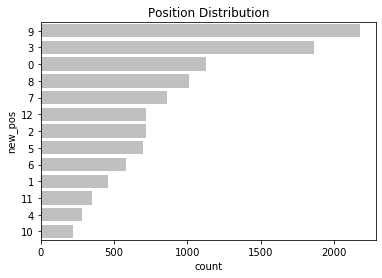

In [777]:
#Plot for entire WNCAA distribution
sns.countplot(color='silver', y='new_pos', data=kmeans_13clusters,order = kmeans_13clusters['new_pos'].value_counts().index).set_title('Position Distribution')
plt.savefig('Position Distribution 13')
plt.savefig('Position Distribution 13_2.eps', format='eps')

In [670]:
acc_filter_list = ['Louisville', 'Notre Dame','NC State','Miami (FL)','Syracuse','Florida St.','Clemson','North Carolina','Georgia Tech','Virginia Tech','Duke','Virginia','Boston College','Pittsburgh','Wake Forest']
acc_kmeans_13=kmeans_13clusters[kmeans_13clusters.Team.isin(acc_filter_list)]
acc_kmeans_13.head(1)

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,Team,Player,Year,old_pos
0,14.0,5.0,12.0,10.0,32.0,68.0,17.0,3.0,61.0,8,Boston College,Mosetti Martina,2017,G


In [762]:
tulsa_filter_list = ['Tulsa']
tulsa_kmeans_13=kmeans_13clusters[kmeans_13clusters.Team.isin(tulsa_filter_list)]
tulsa_kmeans_13.head(1)

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,Team,Player,Year,old_pos
0,64.0,26.0,60.0,18.0,90.0,51.0,15.0,7.0,43.0,8,Tulsa,Dickson Shug,2017,G


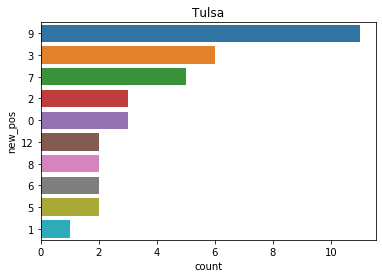

In [768]:
#all years of ACC
sns.countplot(y='new_pos', data=tulsa_kmeans_13,order = tulsa_kmeans_13['new_pos'].value_counts().index).set_title('Tulsa')
plt.savefig('Tulsa_2')
plt.savefig('Tulsa_3.eps', format='eps')

In [765]:
louisville_filter_list = ['Louisville']
louisville_kmeans_13=kmeans_13clusters[kmeans_13clusters.Team.isin(louisville_filter_list)]
louisville_kmeans_13.head(1)

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,Team,Player,Year,old_pos
0,69.0,0.0,27.0,32.0,65.0,37.0,25.0,4.0,65.0,0,Louisville,Jones Jazmine,2017,G


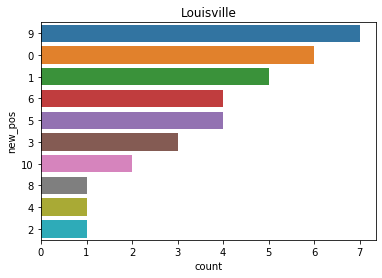

In [769]:
sns.countplot(y='new_pos', data=louisville_kmeans_13,order = louisville_kmeans_13['new_pos'].value_counts().index).set_title('Louisville')
plt.savefig('Louisville_3.eps', format='eps')

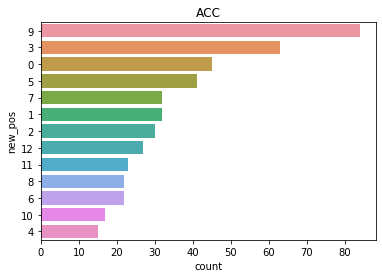

In [689]:
#all years of ACC
sns.countplot(y='new_pos', data=acc_kmeans_13,order = acc_kmeans_13['new_pos'].value_counts().index).set_title('ACC')
plt.savefig('ACC Distribution Horizontal')

In [671]:
kmeans13_19=kmeans_13clusters[kmeans_13clusters['Year']==2019]
kmeans13_19.head(1)

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,Team,Player,Year,old_pos
0,23.0,32.0,24.0,8.0,45.0,53.0,36.0,0.0,50.0,7,A&M-Corpus Christi,Robinson La'Janeira,2019,G


In [772]:
acc_kmeans_13_19=kmeans13_19[kmeans13_19.Team.isin(acc_filter_list)]
acc_kmeans_13_19.tail()

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,Team,Player,Year,old_pos
6,14.0,1.0,6.0,19.0,30.0,12.0,8.0,15.0,21.0,9,Wake Forest,Jarosinski Lindsey,2019,F
7,29.0,0.0,15.0,18.0,24.0,6.0,3.0,11.0,20.0,9,Wake Forest,Morra Christina,2019,F
8,14.0,3.0,3.0,10.0,16.0,7.0,4.0,4.0,32.0,3,Wake Forest,Branch Raegyn,2019,F
9,57.0,15.0,32.0,51.0,89.0,34.0,13.0,6.0,33.0,0,Wake Forest,Sharp Alex,2019,G
10,41.0,31.0,54.0,5.0,79.0,29.0,22.0,2.0,24.0,7,Wake Forest,Penna Elisa,2019,F


Text(0.5, 1.0, 'ACC 2019 Distribution')

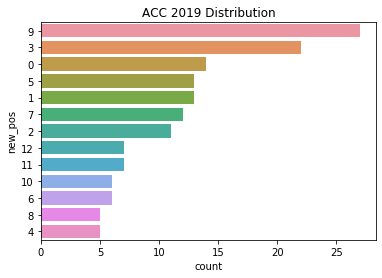

In [684]:
#2019 ACC Distribution
sns.countplot(y='new_pos', data=acc_kmeans_13_19,order = acc_kmeans_13_19['new_pos'].value_counts().index).set_title('ACC 2019 Distribution')

In [672]:
top_4_acc = ['Louisville','Notre Dame','NC State','Miami (FL)']
top_4_acc_kmeans=kmeans13_19[kmeans13_19.Team.isin(top_4_acc)]


Text(0.5, 1.0, 'Top Four ACC 2019')

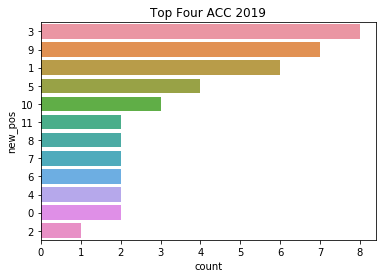

In [680]:
sns.countplot(y='new_pos', data=top_4_acc_kmeans,order = top_4_acc_kmeans['new_pos'].value_counts().index).set_title('Top Four ACC 2019')

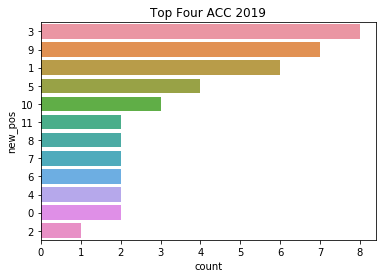

In [770]:
sns.countplot(y='new_pos', data=top_4_acc_kmeans,order = top_4_acc_kmeans['new_pos'].value_counts().index).set_title('Top Four ACC 2019')
plt.savefig('Top Four ACC.eps', format='eps')

In [675]:
bottom_4_acc = ['Virginia','Boston College','Pittsburgh','Wake Forest']
bottom_4_acc_kmeans=kmeans13_19[kmeans13_19.Team.isin(bottom_4_acc)]

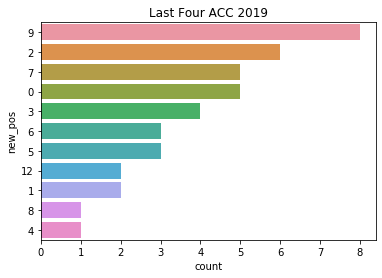

In [771]:
sns.countplot(y='new_pos', data=bottom_4_acc_kmeans,order = bottom_4_acc_kmeans['new_pos'].value_counts().index).set_title('Last Four ACC 2019')
plt.savefig('Last Four ACC.eps', format='eps')

In [715]:
big10_filter_list = ['Nebraska', 'Indiana','Northwestern','Michigan','Rutgers','Minnesota','Maryland','Illinois','Michigan St.','Iowa','Purdue','Ohio St.','Wisconsin','Penn St.']
big10_kmeans_13=kmeans_13clusters[kmeans_13clusters.Team.isin(big10_filter_list)]
big10_kmeans_13.head(5)
big10_kmeans_13.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 9
Data columns (total 14 columns):
2FGM       426 non-null float64
3FG        426 non-null float64
FT         426 non-null float64
ORebs      426 non-null float64
DRebs      426 non-null float64
AST        426 non-null float64
STL        426 non-null float64
BLK        426 non-null float64
PF         426 non-null float64
new_pos    426 non-null int32
Team       426 non-null object
Player     426 non-null object
Year       426 non-null int64
old_pos    426 non-null object
dtypes: float64(9), int32(1), int64(1), object(3)
memory usage: 48.3+ KB


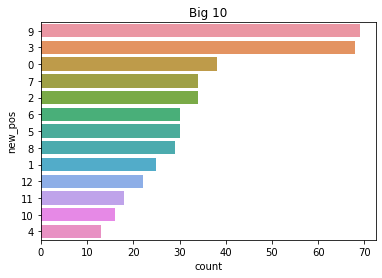

In [688]:
sns.countplot(y='new_pos', data=big10_kmeans_13,order = big10_kmeans_13['new_pos'].value_counts().index).set_title('Big 10')
plt.savefig('Big 10 Horizontal')

In [691]:
america_east_filter_list = ['Stony Brook', 'UMBC','Albany (NY)','Hartford','Vermont','New Hampshire','Maine','UMass Lowell','Binghamton']
america_east_kmeans_13=kmeans_13clusters[kmeans_13clusters.Team.isin(america_east_filter_list)]
america_east_kmeans_13.head(1)

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,Team,Player,Year,old_pos
0,44.0,1.0,8.0,7.0,49.0,95.0,52.0,0.0,65.0,6,Albany (NY),Stokes Khepera,2017,G


Text(0.5, 1.0, 'America East')

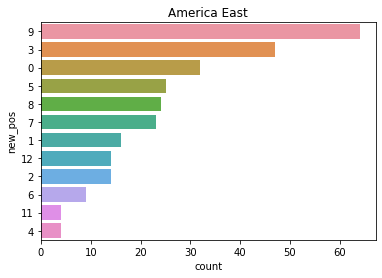

In [692]:
sns.countplot(y='new_pos', data=america_east_kmeans_13,order = america_east_kmeans_13['new_pos'].value_counts().index).set_title('America East')

In [720]:
acc_top_bottom=pd.concat([top_4_acc_kmeans,bottom_4_acc_kmeans],axis=0)
acc_top_bottom.head(5)

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,Team,Player,Year,old_pos
0,80.0,50.0,64.0,19.0,68.0,145.0,56.0,1.0,72.0,6,Louisville,Evans Dana,2019,G
1,108.0,7.0,38.0,50.0,114.0,91.0,39.0,18.0,91.0,5,Louisville,Jones Jazmine,2019,G
2,121.0,0.0,31.0,74.0,95.0,23.0,26.0,21.0,86.0,2,Louisville,Dunham Bionca,2019,F
3,131.0,15.0,80.0,70.0,189.0,51.0,25.0,21.0,78.0,5,Louisville,Fuehring Sam,2019,F
4,81.0,21.0,25.0,64.0,145.0,26.0,22.0,52.0,63.0,4,Louisville,Shook Kylee,2019,F


In [ ]:
acc_top_bottom['top_bottom'] = np.select(acc_top_bottom['Team']=='Z', 'green', 'red')

### 8 Clusters Vis

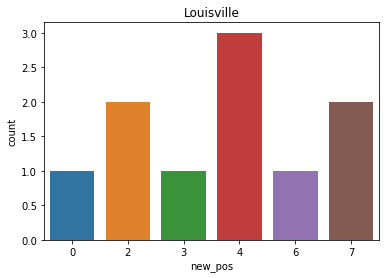

In [489]:
sns.countplot(x='new_pos', data=louisville_19).set_title('Louisville')
plt.savefig('Louisville 2019 Position Distribution')

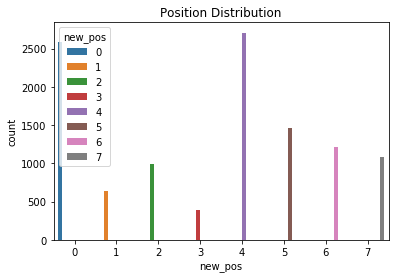

In [710]:
sns.countplot(x='new_pos', data=kmeans_8clusters,hue='new_pos').set_title('Position Distribution')
plt.savefig('Position Distribution')

## PCA 13 Clusters

In [695]:
pca_13=PCA(n_components=2)
pca_13.fit(X2)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [696]:
pca_13.components_

array([[ 0.35037498,  0.16453727,  0.31898267,  0.28980474,  0.37701341,
         0.25530093,  0.24642179,  0.19951746,  0.5971428 ],
       [-0.08878121,  0.69834925,  0.11291457, -0.34510704, -0.09851854,
         0.43972786,  0.20765925, -0.32899271, -0.13473157]])

In [697]:
pca_cluster_13=pca_13.transform(X2)

In [699]:
pca_cluster_13_intial=pd.DataFrame(pca_cluster_13)

In [700]:
pca_cluster_13_intial.head()

,0,1
0,0.086305,0.016520
1,-0.071012,-0.017422
2,0.275239,-0.225009
3,-0.186262,-0.005495
4,0.052487,-0.148655


In [704]:
pca_cluster_13_tableau=pd.concat([pca_cluster_13_intial.reset_index(),kmeans_13clusters.reset_index()],axis=1)

## PCA

In [416]:
pca=PCA(n_components=2)
pca.fit(X2)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [417]:
pca.components_

array([[ 0.35037498,  0.16453727,  0.31898267,  0.28980474,  0.37701341,
         0.25530093,  0.24642179,  0.19951746,  0.5971428 ],
       [-0.08878121,  0.69834925,  0.11291457, -0.34510704, -0.09851854,
         0.43972786,  0.20765925, -0.32899271, -0.13473157]])

In [438]:
pca_cluster_8=pca.transform(X2)

In [439]:
pca_cluster_8_intial=pd.DataFrame(pca_cluster_8)

In [451]:
pca_cluster_8_intial

,0,1
0,0.086305,0.016520
1,-0.071012,-0.017422
2,0.275239,-0.225009
3,-0.186262,-0.005495
4,0.052487,-0.148655
...,...,...
11048,0.283423,-0.147918
11049,0.133025,0.417369
11050,-0.315375,0.022996
11051,-0.037972,-0.121739


In [433]:
pca_cluster_8.head()

,0,1,new_pos
0,0.086305,0.016520,5
1,-0.071012,-0.017422,6
2,0.275239,-0.225009,0
3,-0.186262,-0.005495,6
4,0.052487,-0.148655,6


In [448]:
pca_cluster_8_intial.head()

,0,1
0,0.086305,0.016520
1,-0.071012,-0.017422
2,0.275239,-0.225009
3,-0.186262,-0.005495
4,0.052487,-0.148655


In [447]:
kmeans_8clusters.head()

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,Team,Player,old_pos,Year
0,44.0,18.0,49.0,30.0,67.0,50.0,25.0,7.0,67.0,5,A&M-Corpus Christi,Young Emma,G,2017
1,56.0,6.0,33.0,18.0,57.0,37.0,25.0,5.0,45.0,6,A&M-Corpus Christi,Evans Dae Dae,G,2017
2,93.0,1.0,52.0,61.0,127.0,43.0,30.0,41.0,70.0,0,A&M-Corpus Christi,Davis Camesha,F,2017
3,47.0,10.0,17.0,20.0,35.0,19.0,22.0,0.0,34.0,6,A&M-Corpus Christi,Jackson Brianna,G,2017
4,94.0,0.0,54.0,47.0,60.0,31.0,26.0,25.0,47.0,6,A&M-Corpus Christi,Booth Dalesia,F,2017


In [431]:
pca_cluster_8['new_pos'] = kmeans[1]

In [ ]:
df= df[df.TEAM==""|]

In [453]:
pca_cluster_8_tableau=pd.concat([pca_cluster_8_intial.reset_index(),kmeans_8clusters.reset_index()],axis=1)

In [435]:
pca_cluster_8['Player']=over_100_mins['Player']

ValueError: cannot reindex from a duplicate axis

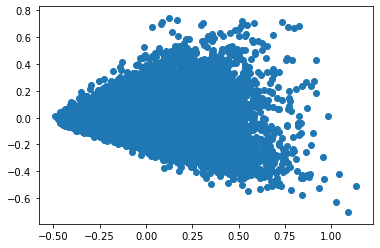

In [430]:
plt.scatter(pca_cluster_8[0],pca_cluster_8[1])

In [458]:
kmeans_8clusters[kmeans_8clusters['Player'] == 'Dangerfield Crystal']

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,Team,Player,old_pos,Year
7,47.0,26.0,16.0,8.0,61.0,114.0,29.0,1.0,39.0,2,UConn,Dangerfield Crystal,G,2017
4,61.0,62.0,25.0,9.0,63.0,142.0,59.0,0.0,35.0,3,UConn,Dangerfield Crystal,G,2018
2,102.0,82.0,61.0,13.0,112.0,225.0,60.0,2.0,53.0,4,UConn,Dangerfield Crystal,G,2019


In [721]:
kmeans_8clusters[kmeans_8clusters['Team'] == 'Louisville']

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,Team,Player,Year
0,69.0,0.0,27.0,32.0,65.0,37.0,25.0,4.0,65.0,5,Louisville,Jones Jazmine,2017
1,24.0,0.0,28.0,17.0,56.0,60.0,37.0,3.0,49.0,0,Louisville,Johnson Taylor,2017
2,61.0,0.0,26.0,40.0,46.0,9.0,10.0,27.0,52.0,5,Louisville,Johnson Ciera,2017
3,211.0,3.0,68.0,99.0,237.0,61.0,33.0,15.0,72.0,2,Louisville,Hines-Allen Myisha,2017
4,69.0,72.0,79.0,74.0,108.0,175.0,34.0,6.0,74.0,1,Louisville,Moore Mariya,2017
5,114.0,119.0,107.0,32.0,90.0,64.0,46.0,14.0,61.0,6,Louisville,Durr Asia,2017
6,60.0,19.0,6.0,28.0,86.0,19.0,8.0,34.0,45.0,0,Louisville,Shook Kylee,2017
7,49.0,0.0,26.0,36.0,50.0,10.0,14.0,0.0,44.0,0,Louisville,Fuehring Sam,2017
8,37.0,0.0,7.0,70.0,75.0,20.0,14.0,5.0,66.0,5,Louisville,Walton Cortnee,2017
9,73.0,5.0,17.0,23.0,82.0,127.0,41.0,3.0,59.0,7,Louisville,Jackson Briahanna,2017


## Cat_0

In [208]:
cat_0_col=cat_0[['2FGM','3FG','FT','ORebs','DRebs','AST','STL','BLK','PF']]

In [209]:
X_cat_0 = min_max.fit_transform(cat_0_col)

In [222]:
kmeans = k_means(X_cat_0, n_clusters=3,max_iter=1000,n_init=20)

In [223]:
cat_0_kmeans = cat_0.copy()
cat_0_kmeans['new_pos_2'] = kmeans[1]

In [224]:
cat_0_kmeans.head(30)

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,old_pos,new_pos_2
2,93.0,1.0,52.0,61.0,127.0,43.0,30.0,41.0,70.0,0,F,1
4,94.0,0.0,54.0,47.0,60.0,31.0,26.0,25.0,47.0,0,F,1
6,66.0,0.0,53.0,60.0,81.0,15.0,15.0,32.0,77.0,0,F,1
1,95.0,35.0,93.0,73.0,144.0,52.0,44.0,14.0,79.0,0,F,2
2,107.0,46.0,68.0,79.0,134.0,92.0,66.0,47.0,94.0,0,F,2
3,121.0,5.0,113.0,101.0,193.0,36.0,29.0,18.0,100.0,0,F,0
0,72.0,5.0,77.0,50.0,188.0,53.0,27.0,12.0,65.0,0,F,1
4,100.0,3.0,40.0,50.0,110.0,95.0,49.0,0.0,81.0,0,G,2
7,63.0,0.0,36.0,60.0,97.0,31.0,9.0,23.0,95.0,0,F,1
0,88.0,0.0,91.0,96.0,139.0,30.0,19.0,5.0,65.0,0,F,1


In [243]:
cat_0_kmeans.describe()

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,new_pos_2
count,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.0,2390.000000
mean,105.196653,8.037238,57.837657,67.257741,123.374895,38.945607,29.880753,25.152301,77.476987,0.0,0.969874
std,48.361264,11.839652,33.871776,25.462628,46.676250,26.854280,16.723329,19.764356,15.128835,0.0,0.661008
min,15.000000,0.000000,4.000000,15.000000,22.000000,1.000000,2.000000,0.000000,32.000000,0.0,0.000000
25%,69.000000,0.000000,33.000000,49.000000,89.000000,20.000000,18.000000,11.000000,66.000000,0.0,1.000000
50%,97.000000,2.000000,51.000000,63.000000,116.000000,33.000000,26.000000,20.000000,77.000000,0.0,1.000000
75%,134.000000,12.000000,74.000000,81.000000,149.750000,51.000000,38.000000,34.000000,88.000000,0.0,1.000000
max,411.000000,81.000000,296.000000,237.000000,398.000000,214.000000,158.000000,128.000000,133.000000,0.0,2.000000


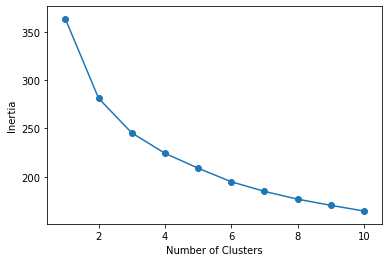

In [252]:
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X_cat_0)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

In [226]:
cat_0_kmeans['new_pos_2'].value_counts()

1    1344
0     559
2     487
Name: new_pos_2, dtype: int64

In [280]:
cat_0_kmeans.sort_values(by=['new_pos_2'])

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,old_pos,new_pos_2
1,180.0,0.0,69.0,122.0,114.0,8.0,40.0,24.0,93.0,0,F,0
2,141.0,12.0,118.0,166.0,273.0,70.0,37.0,14.0,99.0,0,F,0
7,159.0,8.0,99.0,95.0,109.0,32.0,40.0,43.0,73.0,0,F,0
1,165.0,0.0,66.0,75.0,174.0,22.0,31.0,26.0,65.0,0,C,0
1,200.0,2.0,171.0,92.0,286.0,72.0,64.0,61.0,108.0,0,F,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3,73.0,6.0,67.0,21.0,147.0,113.0,55.0,18.0,82.0,0,G,2
3,89.0,0.0,12.0,92.0,191.0,103.0,123.0,13.0,100.0,0,G,2
1,158.0,61.0,69.0,41.0,104.0,70.0,92.0,46.0,105.0,0,G,2
7,90.0,39.0,63.0,62.0,104.0,58.0,38.0,18.0,79.0,0,G,2


In [289]:
cat_0_kmeans.sort_values(by=['new_pos_2']).head(100)

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,old_pos,new_pos_2
1,180.0,0.0,69.0,122.0,114.0,8.0,40.0,24.0,93.0,0,F,0
2,141.0,12.0,118.0,166.0,273.0,70.0,37.0,14.0,99.0,0,F,0
7,159.0,8.0,99.0,95.0,109.0,32.0,40.0,43.0,73.0,0,F,0
1,165.0,0.0,66.0,75.0,174.0,22.0,31.0,26.0,65.0,0,C,0
1,200.0,2.0,171.0,92.0,286.0,72.0,64.0,61.0,108.0,0,F,0
0,166.0,0.0,99.0,69.0,102.0,27.0,37.0,41.0,87.0,0,G,0
3,189.0,3.0,77.0,78.0,145.0,28.0,32.0,10.0,86.0,0,F,0
1,86.0,0.0,56.0,92.0,138.0,46.0,9.0,48.0,73.0,0,F,0
1,102.0,2.0,56.0,120.0,162.0,40.0,64.0,55.0,85.0,0,C,0
6,108.0,3.0,74.0,82.0,93.0,17.0,17.0,21.0,103.0,0,F,0


In [254]:
#catergory 0, catergory 0
cat_00 = cat_0_kmeans[cat_0_kmeans['new_pos_2']==0]

In [257]:
cat_00.head(30)

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,old_pos,new_pos_2
3,121.0,5.0,113.0,101.0,193.0,36.0,29.0,18.0,100.0,0,F,0
6,97.0,0.0,29.0,66.0,112.0,8.0,10.0,90.0,83.0,0,F,0
2,86.0,0.0,34.0,67.0,96.0,27.0,42.0,88.0,122.0,0,C,0
2,89.0,0.0,53.0,47.0,116.0,10.0,14.0,51.0,107.0,0,C,0
1,161.0,12.0,109.0,50.0,154.0,49.0,33.0,62.0,76.0,0,F,0
3,88.0,0.0,34.0,78.0,143.0,18.0,13.0,56.0,76.0,0,F,0
0,205.0,0.0,161.0,163.0,153.0,28.0,61.0,15.0,78.0,0,F,0
4,92.0,7.0,61.0,75.0,81.0,61.0,23.0,48.0,82.0,0,C,0
5,235.0,0.0,100.0,78.0,161.0,9.0,21.0,17.0,50.0,0,C,0
0,138.0,2.0,45.0,82.0,116.0,33.0,36.0,38.0,82.0,0,G,0


In [255]:
cat_00.describe()

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,new_pos_2
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.0,559.0
mean,149.241503,3.610018,77.339893,91.699463,161.669052,37.769231,31.751342,43.831843,85.754919,0.0,0.0
std,48.337456,6.346475,34.391834,27.790032,45.580638,19.951340,13.567991,24.910672,14.285581,0.0,0.0
min,55.000000,0.000000,7.000000,27.000000,71.000000,4.000000,6.000000,1.000000,34.000000,0.0,0.0
25%,114.000000,0.000000,54.000000,73.000000,130.000000,24.000000,22.000000,25.000000,76.000000,0.0,0.0
50%,144.000000,0.000000,72.000000,90.000000,155.000000,34.000000,30.000000,39.000000,85.000000,0.0,0.0
75%,178.500000,5.000000,97.000000,108.000000,181.000000,48.000000,40.000000,59.000000,96.000000,0.0,0.0
max,411.000000,46.000000,189.000000,237.000000,381.000000,142.000000,80.000000,128.000000,131.000000,0.0,0.0


## Cat_1

In [227]:
cat_1_col=cat_1[['2FGM','3FG','FT','ORebs','DRebs','AST','STL','BLK','PF']]

In [228]:
X_cat_1 = min_max.fit_transform(cat_1_col)

In [229]:
kmeans = k_means(X_cat_1, n_clusters=3,max_iter=1000,n_init=20)

In [230]:
cat_1_kmeans = cat_1.copy()
cat_1_kmeans['new_pos_2'] = kmeans[1]

In [235]:
cat_1_kmeans.head(50)

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,old_pos,new_pos_2
1,56.0,6.0,33.0,18.0,57.0,37.0,25.0,5.0,45.0,1,G,2
3,47.0,10.0,17.0,20.0,35.0,19.0,22.0,0.0,34.0,1,G,2
5,35.0,0.0,31.0,53.0,73.0,23.0,10.0,12.0,59.0,1,F,1
7,30.0,0.0,22.0,38.0,42.0,9.0,12.0,2.0,50.0,1,F,1
10,11.0,0.0,42.0,4.0,38.0,43.0,24.0,2.0,35.0,1,G,2
0,50.0,19.0,10.0,30.0,53.0,9.0,9.0,4.0,49.0,1,C,1
5,7.0,28.0,6.0,13.0,36.0,13.0,10.0,4.0,18.0,1,F,0
6,35.0,5.0,36.0,24.0,34.0,75.0,26.0,10.0,32.0,1,G,2
8,10.0,6.0,10.0,10.0,22.0,23.0,7.0,0.0,20.0,1,G,0
9,11.0,0.0,4.0,6.0,17.0,4.0,1.0,5.0,29.0,1,C,0


In [233]:
cat_1_kmeans['new_pos_2'].value_counts()

0    2750
2    1478
1    1436
Name: new_pos_2, dtype: int64

In [244]:
cat_1_kmeans.describe()

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,new_pos_2
count,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.0,5664.000000
mean,23.030367,9.213100,14.884887,17.166490,36.688559,19.098870,11.851518,4.947034,32.757062,1.0,0.775424
std,17.432521,11.557164,11.571969,13.034842,21.434749,15.932006,8.099506,6.027984,15.267800,0.0,0.834360
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000
25%,10.000000,0.000000,6.000000,7.000000,20.000000,7.000000,6.000000,1.000000,20.000000,1.0,0.000000
50%,19.000000,5.000000,12.000000,14.000000,33.000000,15.000000,10.000000,3.000000,32.000000,1.0,1.000000
75%,32.000000,14.000000,21.000000,24.000000,50.000000,27.000000,17.000000,7.000000,44.000000,1.0,2.000000
max,140.000000,83.000000,86.000000,77.000000,156.000000,130.000000,51.000000,62.000000,82.000000,1.0,2.000000


## Cat_2

In [236]:
cat_2_col=cat_2[['2FGM','3FG','FT','ORebs','DRebs','AST','STL','BLK','PF']]

In [237]:
X_cat_2 = min_max.fit_transform(cat_2_col)

In [238]:
kmeans = k_means(X_cat_2, n_clusters=3,max_iter=1000,n_init=20)

In [239]:
cat_2_kmeans = cat_2.copy()
cat_2_kmeans['new_pos_2'] = kmeans[1]

In [240]:
cat_1_kmeans.head(50)

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,old_pos,new_pos_2
1,56.0,6.0,33.0,18.0,57.0,37.0,25.0,5.0,45.0,1,G,2
3,47.0,10.0,17.0,20.0,35.0,19.0,22.0,0.0,34.0,1,G,2
5,35.0,0.0,31.0,53.0,73.0,23.0,10.0,12.0,59.0,1,F,1
7,30.0,0.0,22.0,38.0,42.0,9.0,12.0,2.0,50.0,1,F,1
10,11.0,0.0,42.0,4.0,38.0,43.0,24.0,2.0,35.0,1,G,2
0,50.0,19.0,10.0,30.0,53.0,9.0,9.0,4.0,49.0,1,C,1
5,7.0,28.0,6.0,13.0,36.0,13.0,10.0,4.0,18.0,1,F,0
6,35.0,5.0,36.0,24.0,34.0,75.0,26.0,10.0,32.0,1,G,2
8,10.0,6.0,10.0,10.0,22.0,23.0,7.0,0.0,20.0,1,G,0
9,11.0,0.0,4.0,6.0,17.0,4.0,1.0,5.0,29.0,1,C,0


In [241]:
cat_1_kmeans['new_pos_2'].value_counts()

0    2750
2    1478
1    1436
Name: new_pos_2, dtype: int64

In [245]:
cat_2_kmeans.describe()

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,new_pos_2
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.0,2999.000000
mean,68.123708,41.502501,55.758253,25.946315,84.506502,79.176726,38.621874,6.660554,63.003334,2.0,0.932978
std,36.158973,23.523722,32.429395,14.819284,32.008596,42.708041,17.946860,6.367719,14.771057,0.0,0.771302
min,1.000000,0.000000,1.000000,1.000000,19.000000,9.000000,6.000000,0.000000,17.000000,2.0,0.000000
25%,42.000000,24.000000,33.000000,14.000000,62.000000,48.000000,26.000000,2.000000,53.000000,2.0,0.000000
50%,61.000000,39.000000,49.000000,23.000000,79.000000,70.000000,35.000000,5.000000,63.000000,2.0,1.000000
75%,89.000000,56.000000,71.000000,35.000000,102.000000,101.000000,48.000000,9.000000,73.000000,2.0,2.000000
max,264.000000,154.000000,280.000000,101.000000,258.000000,311.000000,193.000000,55.000000,115.000000,2.0,2.000000


In [267]:
scores={}
num_of_clusters = list(range(1,5))
sub_clusters=3
for num_clusters in num_of_clusters:
    kmeans = k_means(X2, n_clusters=num_clusters,max_iter=1000,n_init=20)
    k_mean_labels=kmeans[1]
    sub_scores={}
    for num in sub_clusters:
        kmeans = k_means(, n_clusters=num_clusters,max_iter=1000,n_init=20)
    scores[num_clusters]=kmeans[2]
print (scores)

{1: 1526.1657347263686, 2: 933.9145806770903, 3: 748.4764284082231, 4: 638.8250071581962}


In [268]:
kmeans = k_means(X2, n_clusters=2,max_iter=1000,n_init=20)
k_mean_labels=kmeans[1]
sub_scores={}
print (k_mean_labels)
    

[0 1 0 ... 1 1 1]


In [ ]:
scores={}
num_of_clusters = list(range(1,5))
sub_clusters=list(range(1,4))
for num_clusters in num_of_clusters:
    kmeans = k_means(X2, n_clusters=num_clusters,max_iter=1000,n_init=20)
    km.fit(X_cat_0)
    inertia.append(km.inertia_)
    for sub_clusters in num_of_clusters:


In [413]:
kmeans_8clusters.to_csv('kmeans_8clusters') 

In [706]:
pca_cluster_13_tableau.to_csv('pca_cluster_13.csv') 

In [705]:
pca_cluster_13_tableau.head()

,index,0,1,index,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,Team,Player,Year,old_pos
0,0,0.086305,0.016520,0,44.0,18.0,49.0,30.0,67.0,50.0,25.0,7.0,67.0,8,A&M-Corpus Christi,Young Emma,2017,G
1,1,-0.071012,-0.017422,1,56.0,6.0,33.0,18.0,57.0,37.0,25.0,5.0,45.0,8,A&M-Corpus Christi,Evans Dae Dae,2017,G
2,2,0.275239,-0.225009,2,93.0,1.0,52.0,61.0,127.0,43.0,30.0,41.0,70.0,4,A&M-Corpus Christi,Davis Camesha,2017,F
3,3,-0.186262,-0.005495,3,47.0,10.0,17.0,20.0,35.0,19.0,22.0,0.0,34.0,3,A&M-Corpus Christi,Jackson Brianna,2017,G
4,4,0.052487,-0.148655,4,94.0,0.0,54.0,47.0,60.0,31.0,26.0,25.0,47.0,0,A&M-Corpus Christi,Booth Dalesia,2017,F


In [703]:
kmeans_13clusters.head()

,2FGM,3FG,FT,ORebs,DRebs,AST,STL,BLK,PF,new_pos,Team,Player,Year,old_pos
0,44.0,18.0,49.0,30.0,67.0,50.0,25.0,7.0,67.0,8,A&M-Corpus Christi,Young Emma,2017,G
1,56.0,6.0,33.0,18.0,57.0,37.0,25.0,5.0,45.0,8,A&M-Corpus Christi,Evans Dae Dae,2017,G
2,93.0,1.0,52.0,61.0,127.0,43.0,30.0,41.0,70.0,4,A&M-Corpus Christi,Davis Camesha,2017,F
3,47.0,10.0,17.0,20.0,35.0,19.0,22.0,0.0,34.0,3,A&M-Corpus Christi,Jackson Brianna,2017,G
4,94.0,0.0,54.0,47.0,60.0,31.0,26.0,25.0,47.0,0,A&M-Corpus Christi,Booth Dalesia,2017,F
